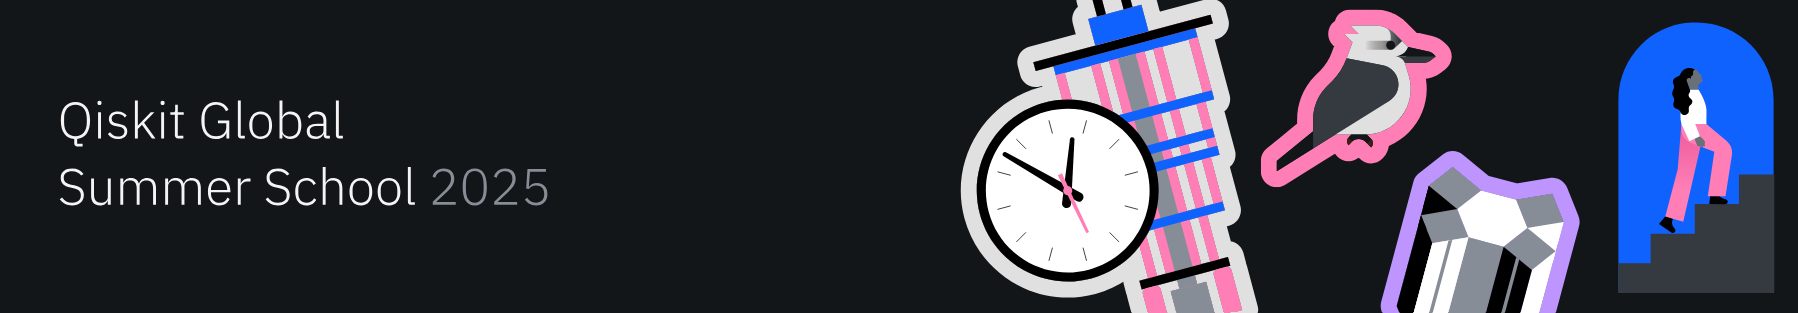

# Lab 0: Hello Quantum World!

# Table of Contents

* [Welcome to the Qiskit Global Summer School 2025!](#welcome)
    - [Lab 0 overview](#overview)
    - [Install Qiskit](#install)
    - [Troubleshooting](#troubleshooting)
    - [Setting API token](#setting-ibm-cloud)
    - [Imports](#imports)
    - [Sanity check](#sanity-check)
* [Generate a three-qubit GHZ state using Qiskit patterns](#ghz) 
    - [Step 1. Map](#map)
    - [Step 2. Optimize](#optimize)
    - [Step 3. Execute](#execute)
    - [Step 4. Post-process](#post-process)
* [Congratulations!](#congratulations)
    - [Bonus challenge: Run GHZ on hardware](#bonus)


# Welcome to the Qiskit Global Summer School 2025! <a id="welcome"></a>

We are thrilled to welcome you to another year of the Qiskit Global Summer School (QGSS). This two-week summer program combines theoretical lectures with hands-on exercises to expand the knowledge of quantum computing and quantum programming among the community of students, researchers, and professionals that use Qiskit in their everyday quantum journey. 

The hands-on component of this summer school consists of a series of Jupyter notebooks ("labs") designed to guide you through different topics of interest.

Each lab complements the corresponding theoretical lectures and includes helpful links to documentation, tutorials, and references to the lectures. Furthermore, you can also find many useful resources in [IBM Quantum Learning](https://quantum.cloud.ibm.com/learning).

## Lab 0 overview <a id="overview"></a>

The main goal of this introductory lab is to show you how to use the challenge notebooks, grade your solutions, and verify that your computer is correctly set up for executing the quantum codes that you will be asked to complete.

To complete the different labs of the QGSS, you need to know that every notebook will contain some predefined cells that you should not modify, and some challenge code blocks that you will need to fill with your own code. In particular, you will need to write the required code below each line that has the `### WRITE YOUR CODE BELOW HERE ###` comment. Make sure that every time you restart the kernel, you execute every cell in order, so that the challenge notebooks execute and are graded properly. This will guarantee that all the code is updated and everything runs smoothly. There may be a few exceptions, such as installation cells or cells where you save your account credentials. These will likely only need to be run once.

The content of this lab focuses on using Qiskit patterns to produce a GHZ state, emphasizing the importance of designing optimized quantum circuits. At the end is a bonus exercise where you can execute your code on a real quantum computer.

## Install Qiskit <a id="install"></a>
Quantum computers stand as a technology that promises to disrupt how some calculations are done - from breaking encryption with Shor's algorithm, to enabling faster searches with Grover's algorithm, to designing better batteries with quantum phase estimation. A first step is choosing a software tool for designing and executing such algorithms. In these challenges you will use Qiskit for the design and implementation of quantum circuits in simulators and real hardware. The following will help you install Qiskit v2.0.

First, check that the version of Python you are using in your environment is python>=3.10, to make sure that it is compatible with the latest Qiskit version we will use:

In [1]:
from platform import python_version

print(python_version())

3.12.4


If that is not the case, you can upgrade it using your preferred tool. If you are unsure how to do it, some recommended options are:

- MacOS: [Homebrew](https://brew.sh/)
- Linux: `sudo apt-get update `

A detailed guide on how to upgrade Python depending on your OS is detailed here: [How to update Python](https://4geeks.com/how-to/how-to-update-python-version)

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** You cannot run Lab 3 of the QGSS using Windows. Hence, if you are using Windows, we recommend you use [an online lab environment.](https://docs.quantum.ibm.com/guides/online-lab-environments) 


</div>

For more information take a look at the wiki: https://github.com/qiskit-community/qgss-2025/wiki/Jupyter-Notebook-Environment-(Local-and-Online)

Now let's install the grader that will install Qiskit 2.x and the necessary libraries we will need for the summer school.

In [2]:
import qiskit


print(f"Qiskit version: {qiskit.__version__}")

Qiskit version: 2.1.1
Grader version: 0.22.10


You should have Qiskit version `>=2.0.0` and Grader `>=0.22.9`. If you see a lower version, you need to restart your kernel and reinstall the grader.

## Troubleshooting <a id="troubleshooting"></a>

If the previous cell raised an error, you can opt to install Qiskit in a virtual environment (two suggested methods follow). If you have no errors, you can ignore this cell and proceed to the next one.

Here we propose two different methods to set up a virtual environment to install Qiskit.
1. Using [venv](https://docs.python.org/3/library/venv.html), as explained in the [Qiskit installation guide](https://docs.quantum.ibm.com/guides/install-qiskit). 
2. Using [conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html), as explained in this video of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4).

## Set up your IBM Cloud account <a id="setting-ibm-cloud"></a>

You must set up an IBM Cloud account in order to track progress with the grader, and to execute quantum circuits on real hardware.


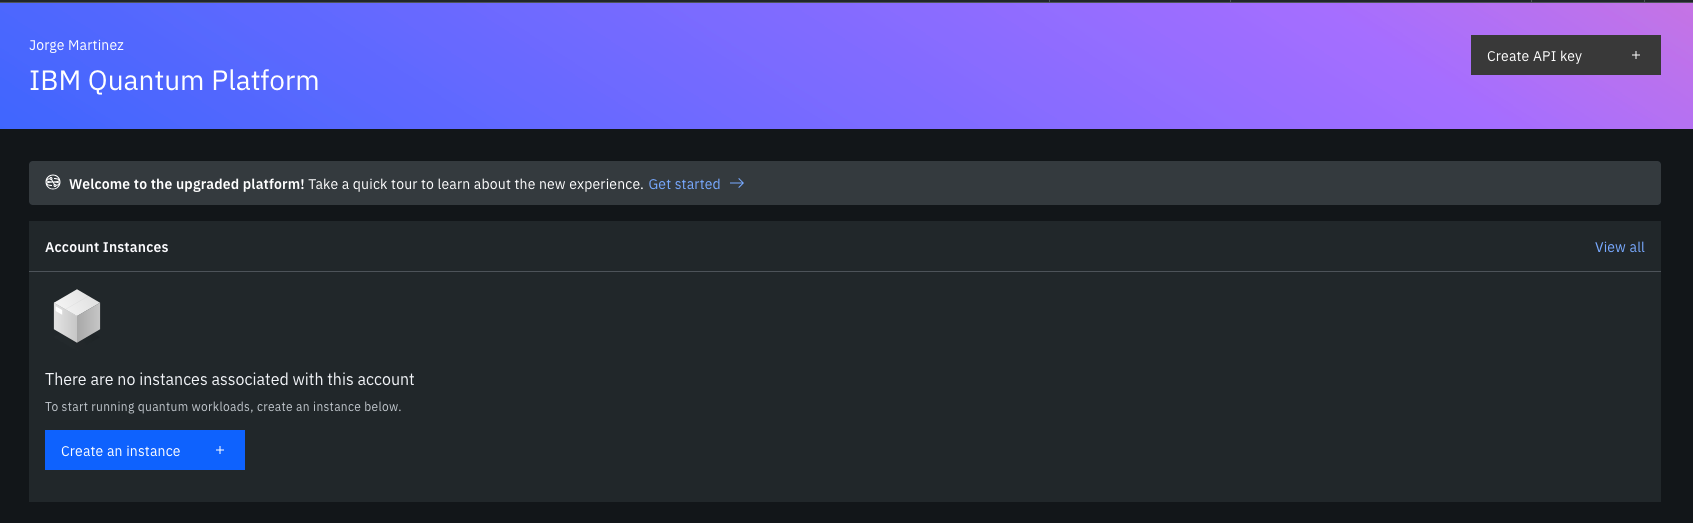




Set up your account as follows:

1. Go to the [upgraded IBM Quantum&reg; Platform](https://quantum.cloud.ibm.com/).
2. Go to the top right corner (as shown in the above picture), create your API token, and copy it to a secure location.
3. In the next cell, replace `deleteThisAndPasteYourAPIKeyHere` with your API key.
4. Go to the bottom left corner (as shown in the above picture) and **create your instance**. Make sure to choose the open plan.
5. After the instance is created, copy its associated CRN code. You may need to refresh to see the instance.
6. In the cell below, replace `deleteThisAndPasteYourCRNHere` with your CRN code.

See [this guide](https://quantum.cloud.ibm.com/docs/guides/cloud-setup) for more details on how to set up your IBM Cloud&reg; account.

<div class="alert alert-block alert-warning">
    
⚠️ **Note:** Treat your API key as you would a secure password. See the [Cloud setup](https://quantum.cloud.ibm.com/docs/guides/cloud-setup#cloud-save) guide for more information about using your API key in both secure and untrusted environments.
</div>

In [3]:
# Save your API key to track your progress and have access to the quantum computers

your_api_key = "..."
your_crn = "..."
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [4]:
# Check that the account has been saved properly
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'HraWhFH2rDYdo34DzJejGFRlLTCsAa88ZfmGysuHTq4S',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/cb58759cb2f14a83995fb7c34cc82d22:7fd3ad90-1648-460d-ae6e-b763264411ce::',
  'verify': True,
  'private_endpoint': False}}

## Imports <a id="imports"></a>


In [5]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

## Sanity check <a id="sanity-check"></a>

Let's now create a very simple quantum circuit to check that everything is working as expected.

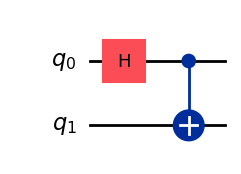

In [6]:
# Create a new circuit with a single qubit
qc = QuantumCircuit(2)
# Add a H gate to qubit 0
qc.h(0)
# Add a CNOT gate to qubit 1
qc.cx(0, 1)
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

The output you see represents a quantum circuit that produces a Bell state:

$$|Bell\rangle=\frac{|00\rangle+|11\rangle}{\sqrt{2}}$$

# Generate a three-qubit GHZ state using Qiskit patterns <a id="ghz"></a>

Now, we will follow this episode of [Coding with Qiskit](https://www.youtube.com/watch?v=93-zLTppFZw&list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&index=4) to guide you through the process of generating a three-qubit GHZ state using [Qiskit patterns](https://quantum.cloud.ibm.com/docs/en/guides/intro-to-patterns). 

A Qiskit pattern is a general framework for breaking down domain-specific problems and contextualizing required capabilities in stages. This allows for the seamless composability of new capabilities developed by IBM Quantum researchers (and others) and enables a future in which quantum computing tasks are performed by powerful heterogenous (CPU/GPU/QPU) computing infrastructure. 

The four steps of a Qiskit pattern are as follows:

1. **Map** problem to quantum circuits and operators
2. **Optimize** for target hardware
3. **Execute** on target hardware
4. **Post-process** results


## Step 1. Map <a id="map"></a>

The Greenberger–Horne–Zeilinger (GHZ) state is the extension to three (or more) qubits to the maximally entangled state characteristic of the Bell state depicted above. That means that the GHZ state is:

$$
|GHZ\rangle = \frac{|000\rangle+|111\rangle}{\sqrt{2}}.
$$

One of the interesting features of the GHZ state is that there are different and equivalent ways to build it using a quantum circuit. In Exercise 1 you will do it in one of the most common ways.

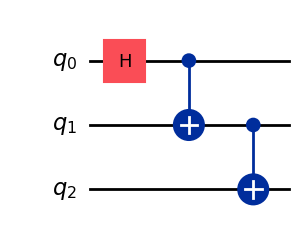

In [7]:
# Create a new circuit with three qubits
qc = QuantumCircuit(3)

### WRITE YOUR CODE BELOW HERE ###
# Add a H gate to qubit 0
qc.h(0)

# Add a CNOT gate to qubits 0 and 1
qc.cx(0, 1)

# Add a CNOT gate to qubits 1 and 2
qc.cx(1, 2)
### YOUR CODE FINISHES HERE    ###

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

## Step 2. Optimize <a id="optimize"></a>

Well done designing the circuit!

In this case, the circuit is very shallow, and it is not possible to further simplify it or reduce the required number of gates that are needed to build the GHZ state. However, there are other scenarios in which optimizing the circuit is key.

There may be situations where you face restrictions in how your quantum circuit can be designed. For example, when running circuits on quantum hardware, you might find connectivity constraints between qubits. This means that some qubits may not be physically connected, so you will need to think of a smart way to implement gates that produce the desired quantum state. Luckily for us, this is where the Qiskit pass manager comes to the rescue! You can provide the desired circuit along with the device's constraints to the pass manager and it will transpile the circuit and handle the optimization for you.

Let us consider, for the GHZ state, a situation in which we are limited to interactions only between qubits 0 and 1 and qubits 0 and 2, but not between qubits 1 and 2. We can introduce these constraints to the paass manager using the `generate_preset_pass_manager` function.

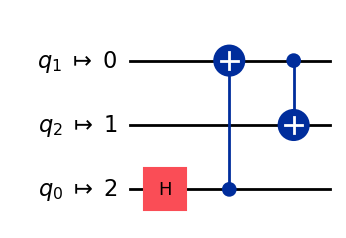

In [8]:
from qiskit import QuantumCircuit
from qiskit.transpiler import CouplingMap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Re-create the original GHZ circuit
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

### WRITE YOUR CODE BELOW HERE ###
# Define the connectivity constraint: only qubit 0 is connected to qubits 1 and 2
coupling_map = [[0, 1], [1, 0], [0, 2], [2, 0]]

# Create CouplingMap object from the list
coupling = CouplingMap(couplinglist=coupling_map)

# Generate the pass manager with optimization level 1 and the defined coupling map
pm = generate_preset_pass_manager(optimization_level=1, coupling_map=coupling)
### YOUR CODE FINISHES HERE ###

# Apply transpilation
qc_transpiled = pm.run(qc)

# Draw the transpiled circuit
qc_transpiled.draw("mpl")

In [9]:
# Add measurement operations
qc.measure_all()

# Set up the backend
backend = AerSimulator()

# Set up the sampler
sampler = Sampler(mode=backend)

# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))

# Get the results
results_sampler = job.result()

Now, we run our circuit using the Estimator primitive, then save the results as the variable `results_estimator`.

In [10]:
# Set up the Estimator
estimator = Estimator(mode=backend)

# Define some observables
ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

# Submit the circuit to Estimator
pub = (qc, observables)
job = estimator.run(pubs=[pub])

# Get the results
results_estimator = job.result()

Next is the final step of Qiskit patterns, where we will visualize our results.

## Step 4. Post-process <a id="post-process"></a>

Finally, the last step of Qiskit patterns is to post-process the information we have gathered from the execution of the quantum circuit.

First we visualize the results from the Sampler. We can visualize the counts with a histogram plot and quickly see how the two possible quantum states are measured with a probability of 50%.

  Outcomes : {'000': 512, '111': 512}


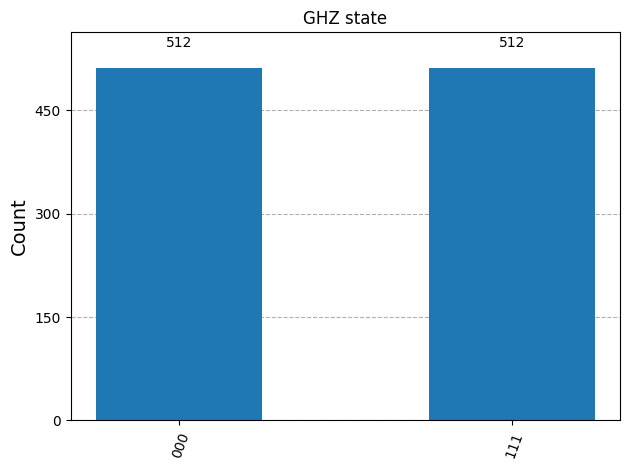

In [11]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Now we can visualize the results of the Estimator.

Expectation values: [('ZZZ', 0.02294921875), ('ZZX', 0.00146484375), ('ZII', -0.00830078125), ('XXI', 0.0126953125), ('ZZI', 1.0), ('III', 1.0)]


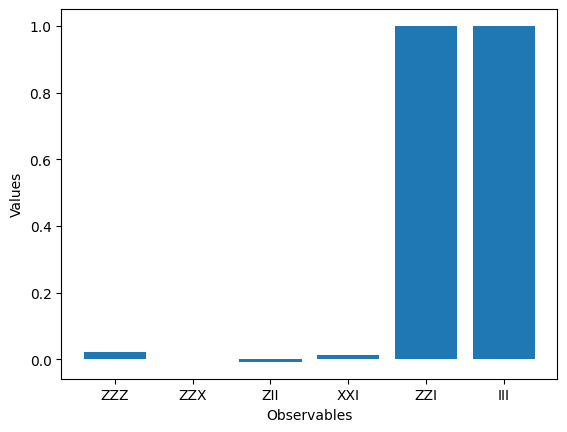

In [12]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")

# Set up our plot
container = plt.bar(observables_list, exp_values, width=0.8)
# Label each axis
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

We see that the observables $ZZI$ and $III$ have an expectation value of 1, since $ZZI$ introduces two minus signs that cancel out, and $III$ acts as the identity, leaving the GHZ state unchanged. The rest of the observables have an expectation value of 0, since their $Z$ operators introduce an odd number of minus signs, or the $X$ operators flip a number of qubits that make the overlapping states orthogonal.


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        8871356.814654  0.000143        0.380382        -0.000000      
3               0.030 0.121885        393215.619148   0.000429        1.141145        -0.000000      
6               0.060 0.151251        963177.794347   0.000857        2.282291        -0.000000      


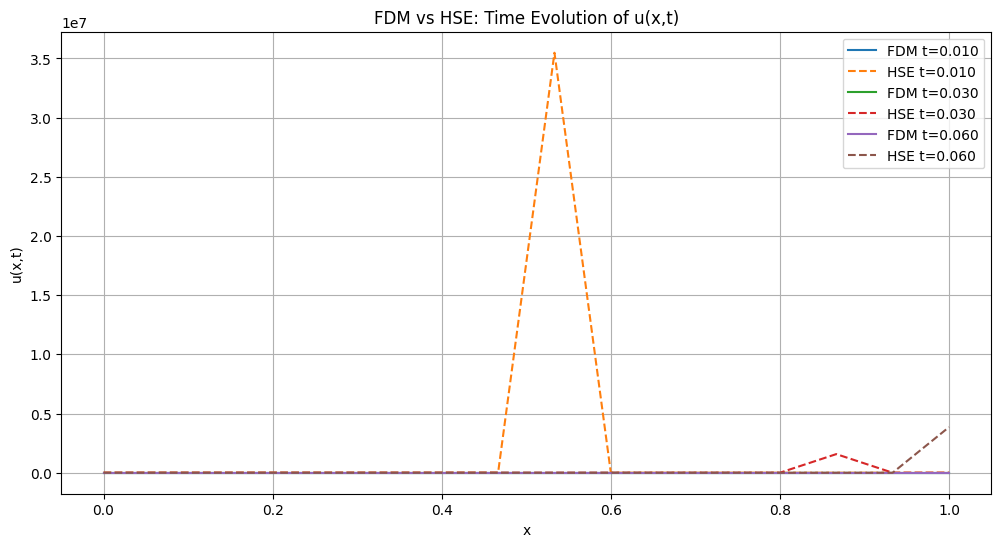

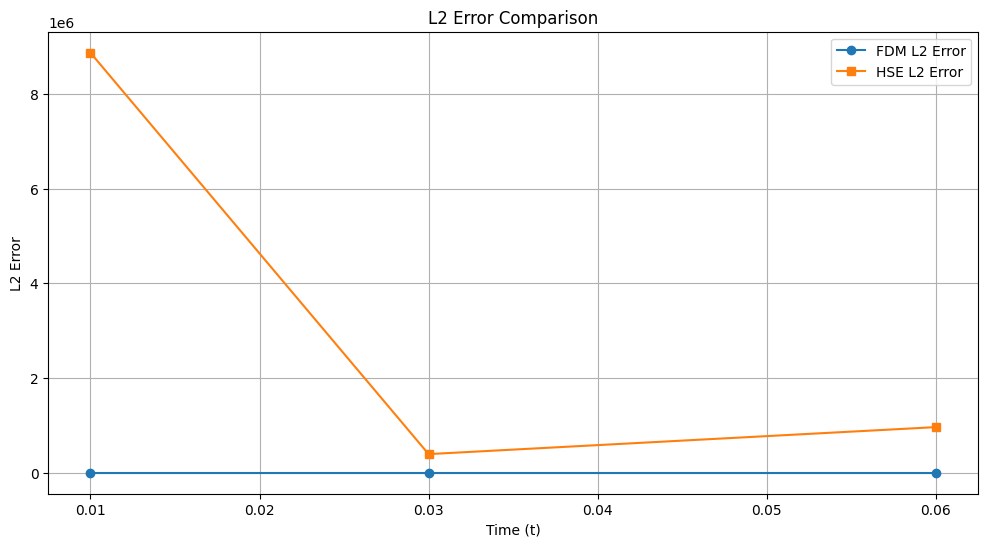

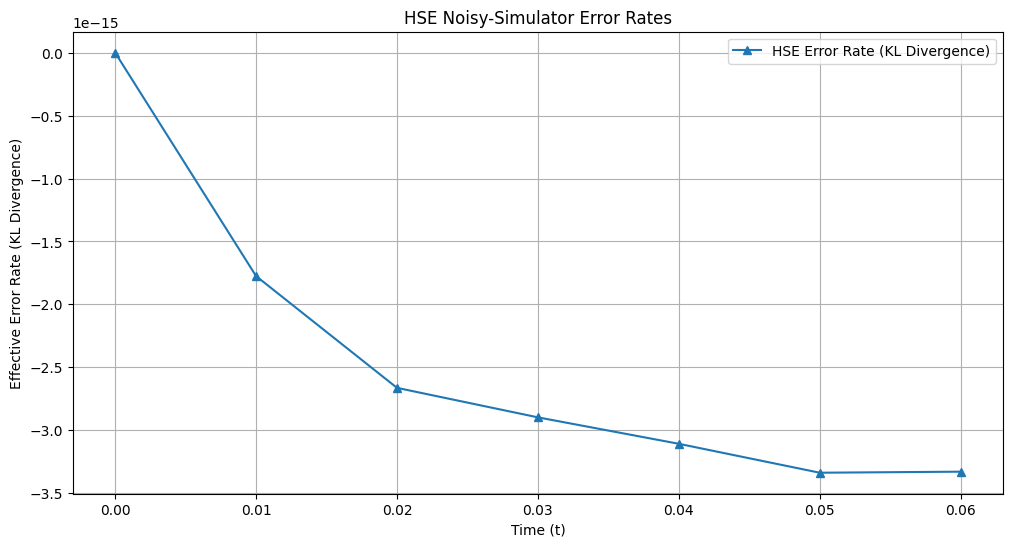

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import PauliEvolutionGate
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 6  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
num_qubits = int(np.log2(nx))
if 2**num_qubits != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")

# Initial condition (Riemann step)
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0
        u_new[-1] = 0.0
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Quantum HSE Solver ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01):
    # Hamiltonian construction
    coeff = -1.0 / (2 * ν)
    pauli_terms = []
    for i in range(num_qubits - 1):
        op_xx = ['I'] * num_qubits
        op_xx[i] = 'X'
        op_xx[i+1] = 'X'
        pauli_terms.append(("".join(op_xx), coeff))
        op_yy = ['I'] * num_qubits
        op_yy[i] = 'Y'
        op_yy[i+1] = 'Y'
        pauli_terms.append(("".join(op_yy), coeff))
    hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
    
    # Initial state
    psi_initial = np.sqrt(np.abs(u_initial) + np.finfo(float).eps)
    psi_initial /= np.linalg.norm(psi_initial)
    current_state = Statevector(psi_initial)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    
    u_history = [u_initial.copy()]  # Include initial state
    error_rates = [0.0]  # Initial error rate (no noise for t=0)
    start_time = time.time()
    
    for t_step in range(nt):
        # Measure probabilities
        qc = QuantumCircuit(num_qubits)
        qc.initialize(current_state.data, range(num_qubits))
        qc.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        transpiled_qc = pm.run(qc)
        job = backend.run(transpiled_qc, shots=8192)
        result = job.result()
        counts = result.get_counts()
        probabilities = np.zeros(nx)
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                probabilities[idx] = count / total_counts
        
        # Compute velocity
        psi_mag = np.sqrt(probabilities + np.finfo(float).eps)
        d_psi_mag_dx = np.gradient(psi_mag, dx)
        u_hse = -2 * ν * d_psi_mag_dx / (psi_mag + np.finfo(float).eps)
        u_history.append(u_hse)
        
        # Estimate error rate (KL divergence)
        ideal_backend = AerSimulator()
        ideal_job = ideal_backend.run(pm.run(qc), shots=8192)
        ideal_counts = ideal_job.result().get_counts()
        kl_div = sum(p * np.log(p / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 8192 + np.finfo(float).eps)) 
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
        
        # Evolve state
        evolution_gate = PauliEvolutionGate(hamiltonian_op, time=dt)
        evolution_circuit = QuantumCircuit(num_qubits)
        evolution_circuit.append(evolution_gate, range(num_qubits))
        current_state = current_state.evolve(evolution_circuit)
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Approximate Analytical Solution ---
def analytical_solution(x, t, ν):
    shock_pos = 0.5 + 0.5 * t  # Simplified shock movement
    return np.where(x <= shock_pos, 1.0, 0.0)

# --- Run Solvers ---
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t, ν)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")

# --- Visualizations ---
# 1. Time Evolution Comparison
plt.figure(figsize=(12, 6))
for t_idx in time_steps:
    t = t_idx * dt
    plt.plot(x, fdm_history[t_idx], label=f'FDM t={t:.3f}', linestyle='-')
    plt.plot(x, hse_history[t_idx], label=f'HSE t={t:.3f}', linestyle='--')
plt.title('FDM vs HSE: Time Evolution of u(x,t)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# 2. L2 Error Comparison
plt.figure(figsize=(12, 6))
plt.plot([t * dt for t in time_steps], fdm_l2_errors, label='FDM L2 Error', marker='o')
plt.plot([t * dt for t in time_steps], hse_l2_errors, label='HSE L2 Error', marker='s')
plt.title('L2 Error Comparison')
plt.xlabel('Time (t)')
plt.ylabel('L2 Error')
plt.legend()
plt.grid(True)
plt.show()

# 3. Error Rate (HSE)
plt.figure(figsize=(12, 6))
plt.plot([t * dt for t in range(nt+1)], error_rates, label='HSE Error Rate (KL Divergence)', marker='^')
plt.title('HSE Noisy-Simulator Error Rates')
plt.xlabel('Time (t)')
plt.ylabel('Effective Error Rate (KL Divergence)')
plt.legend()
plt.grid(True)
plt.show()


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        8950281.033211  0.000000        1.339294        -0.000000      
3               0.030 0.121885        268571.143597   0.000000        4.017881        -0.000000      
6               0.060 0.151251        874804.516315   0.000000        8.035761        -0.000000      


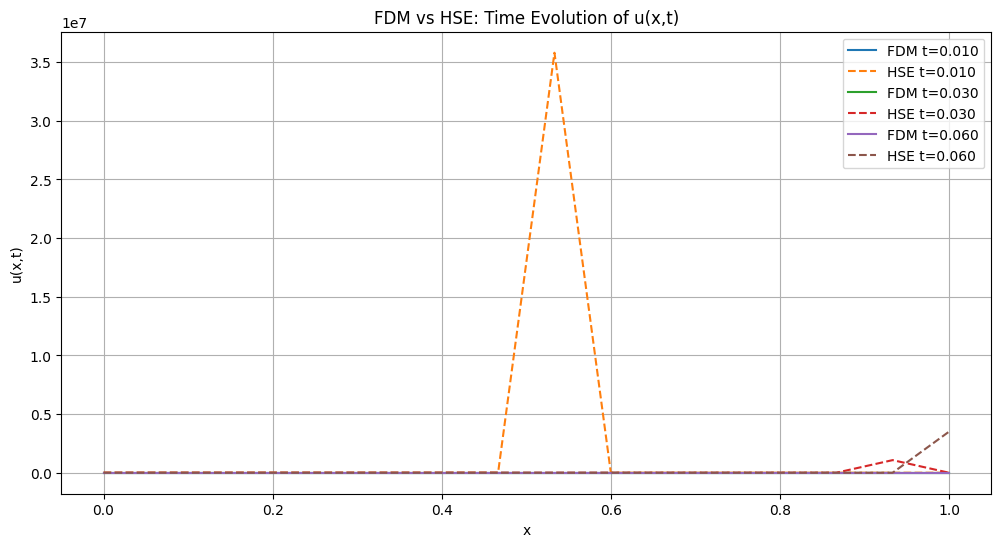

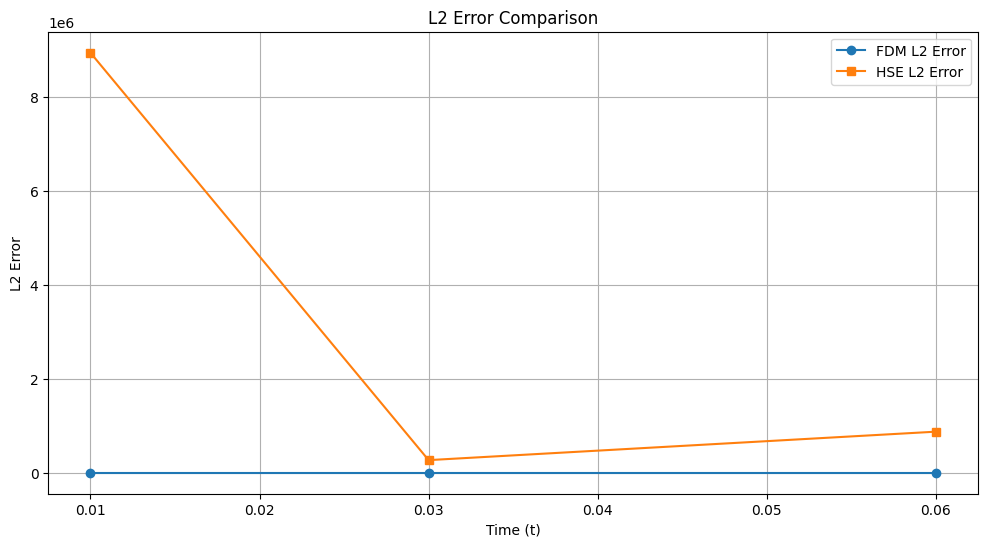

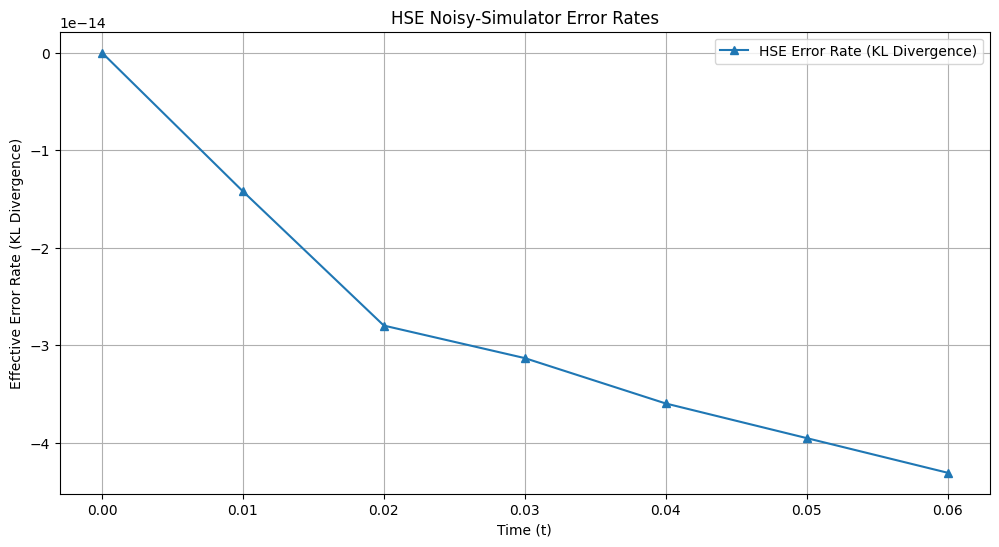

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import PauliEvolutionGate
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 6  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
num_qubits_per_component = int(np.log2(nx))
if 2**num_qubits_per_component != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")
num_qubits = 2 * num_qubits_per_component  # Two components

# Initial condition (Riemann step)
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0
        u_new[-1] = 0.0
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Quantum HSE Solver with Two-Component Wave Function ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01):
    # Hamiltonian construction (two components)
    coeff_diff = -1.0 / (2 * ν)  # Diffusion term
    coeff_adv = -0.1  # Advection term (tuned)
    coeff_vort = 0.05  # Vorticity term (tuned)
    pauli_terms = []
    for i in range(num_qubits_per_component - 1):
        # Component 1: XX and YY (diffusion)
        op_xx1 = ['I'] * num_qubits
        op_xx1[i] = 'X'
        op_xx1[i+1] = 'X'
        pauli_terms.append(("".join(op_xx1), coeff_diff))
        op_yy1 = ['I'] * num_qubits
        op_yy1[i] = 'Y'
        op_yy1[i+1] = 'Y'
        pauli_terms.append(("".join(op_yy1), coeff_diff))
        # Component 1: ZZ (advection)
        op_zz1 = ['I'] * num_qubits
        op_zz1[i] = 'Z'
        op_zz1[i+1] = 'Z'
        pauli_terms.append(("".join(op_zz1), coeff_adv))
        # Component 2: XX and YY (diffusion)
        op_xx2 = ['I'] * num_qubits
        op_xx2[i + num_qubits_per_component] = 'X'
        op_xx2[i + 1 + num_qubits_per_component] = 'X'
        pauli_terms.append(("".join(op_xx2), coeff_diff))
        op_yy2 = ['I'] * num_qubits
        op_yy2[i + num_qubits_per_component] = 'Y'
        op_yy2[i + 1 + num_qubits_per_component] = 'Y'
        pauli_terms.append(("".join(op_yy2), coeff_diff))
        # Component 2: ZZ (advection)
        op_zz2 = ['I'] * num_qubits
        op_zz2[i + num_qubits_per_component] = 'Z'
        op_zz2[i + 1 + num_qubits_per_component] = 'Z'
        pauli_terms.append(("".join(op_zz2), coeff_adv))
        # Cross-component: XY (vorticity)
        op_xy = ['I'] * num_qubits
        op_xy[i] = 'X'
        op_xy[i + num_qubits_per_component] = 'Y'
        pauli_terms.append(("".join(op_xy), coeff_vort))
    hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
    
    # Initial state (two components)
    psi_initial = np.sqrt(np.abs(u_initial) + np.finfo(float).eps)
    psi_initial /= np.linalg.norm(psi_initial)
    psi_initial_1 = psi_initial / np.sqrt(2)
    psi_initial_2 = psi_initial / np.sqrt(2)
    psi_full = np.kron(psi_initial_1, psi_initial_2)
    psi_full /= np.linalg.norm(psi_full)  # Ensure normalization
    current_state = Statevector(psi_full)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    
    u_history = [u_initial.copy()]  # Include initial state
    error_rates = [0.0]  # Initial error rate (no noise for t=0)
    start_time = time.time()
    
    for t_step in range(nt):
        # Measure probabilities
        qc = QuantumCircuit(num_qubits)
        qc.initialize(current_state.data, range(num_qubits))
        qc.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        transpiled_qc = pm.run(qc)
        job = backend.run(transpiled_qc, shots=16384)  # Increased shots
        result = job.result()
        counts = result.get_counts()
        probabilities = np.zeros(nx * nx)  # Two components
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                if idx < nx * nx:
                    probabilities[idx] = count / total_counts
        
        # Compute marginal probabilities for each component
        probs_1 = np.zeros(nx)
        probs_2 = np.zeros(nx)
        for idx in range(nx * nx):
            idx1 = idx // nx
            idx2 = idx % nx
            probs_1[idx1] += probabilities[idx]
            probs_2[idx2] += probabilities[idx]
        
        # Compute velocity
        psi_mag_1 = np.sqrt(probs_1 + np.finfo(float).eps)
        psi_mag_2 = np.sqrt(probs_2 + np.finfo(float).eps)
        d_psi_mag_dx_1 = np.gradient(psi_mag_1, dx)
        d_psi_mag_dx_2 = np.gradient(psi_mag_2, dx)
        u_hse = -ν * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) + 
                      d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        u_history.append(u_hse)
        
        # Estimate error rate (KL divergence)
        ideal_backend = AerSimulator()
        ideal_job = ideal_backend.run(pm.run(qc), shots=16384)
        ideal_counts = ideal_job.result().get_counts()
        kl_div = sum(p * np.log(p / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 16384 + np.finfo(float).eps)) 
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
        
        # Evolve state
        evolution_gate = PauliEvolutionGate(hamiltonian_op, time=dt)
        evolution_circuit = QuantumCircuit(num_qubits)
        evolution_circuit.append(evolution_gate, range(num_qubits))
        current_state = current_state.evolve(evolution_circuit)
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Approximate Analytical Solution ---
def analytical_solution(x, t, ν):
    shock_pos = 0.5 + 0.5 * t  # Simplified shock movement
    return np.where(x <= shock_pos, 1.0, 0.0)

# --- Run Solvers ---
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t, ν)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")

# --- Visualizations ---
# 1. Time Evolution Comparison
plt.figure(figsize=(12, 6))
for t_idx in time_steps:
    t = t_idx * dt
    plt.plot(x, fdm_history[t_idx], label=f'FDM t={t:.3f}', linestyle='-')
    plt.plot(x, hse_history[t_idx], label=f'HSE t={t:.3f}', linestyle='--')
plt.title('FDM vs HSE: Time Evolution of u(x,t)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# 2. L2 Error Comparison
plt.figure(figsize=(12, 6))
plt.plot([t * dt for t in time_steps], fdm_l2_errors, label='FDM L2 Error', marker='o')
plt.plot([t * dt for t in time_steps], hse_l2_errors, label='HSE L2 Error', marker='s')
plt.title('L2 Error Comparison')
plt.xlabel('Time (t)')
plt.ylabel('L2 Error')
plt.legend()
plt.grid(True)
plt.show()

# 3. Error Rate (HSE)
plt.figure(figsize=(12, 6))
plt.plot([t * dt for t in range(nt+1)], error_rates, label='HSE Error Rate (KL Divergence)', marker='^')
plt.title('HSE Noisy-Simulator Error Rates')
plt.xlabel('Time (t)')
plt.ylabel('Effective Error Rate (KL Divergence)')
plt.legend()
plt.grid(True)
plt.show()


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        340534.721553   0.000000        0.424378        -0.000000      
3               0.030 0.121885        589823.672650   0.000000        1.273135        -0.000000      
6               0.060 0.151251        1621270.181459  0.000000        2.546270        -0.000000      


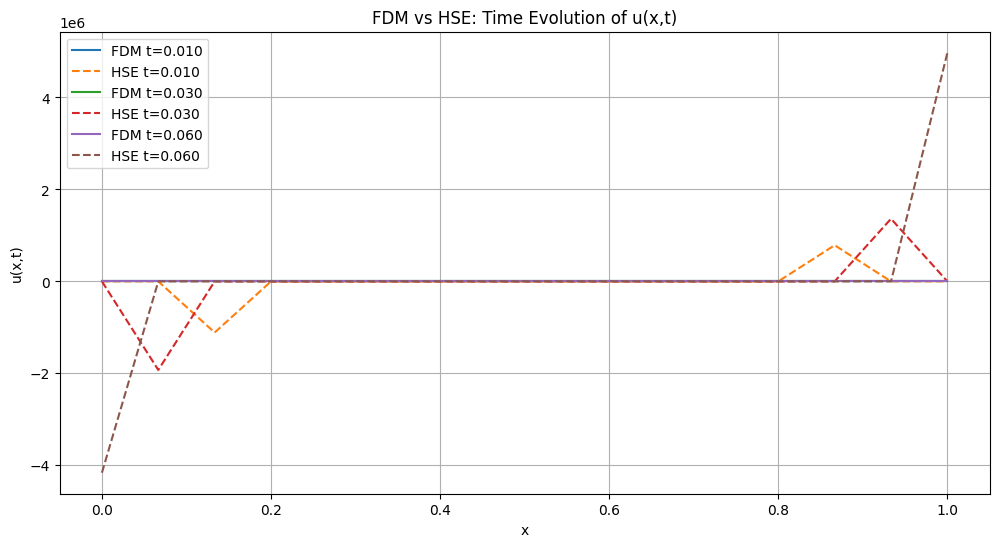

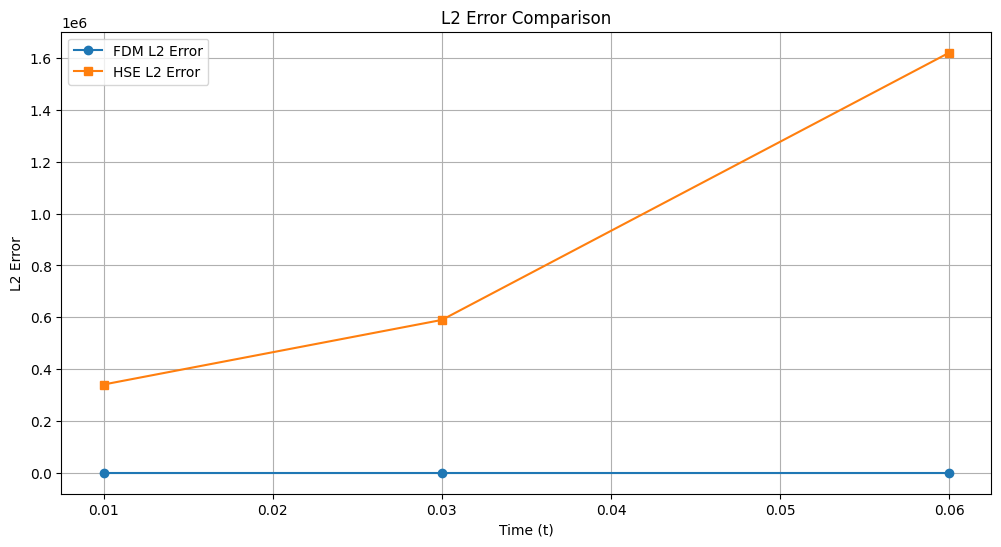

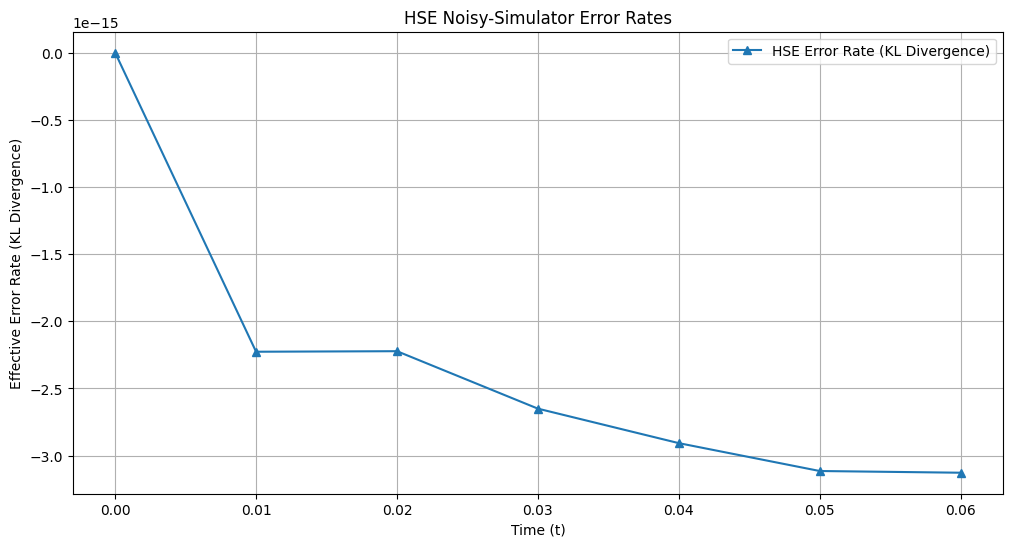

In [18]:


# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 6  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
num_qubits = int(np.log2(nx))
if 2**num_qubits != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")

# Initial condition (Riemann step for FDM, Gaussian for HSE)
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0
        u_new[-1] = 0.0
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Quantum HSE Solver ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01):
    # Hamiltonian construction (tight-binding for Laplacian)
    coeff = -1.0 / (2 * ν)
    pauli_terms = []
    for i in range(num_qubits - 1):
        # |i⟩⟨i+1| + |i+1⟩�langle;i| → XX + YY terms
        op_xx = ['I'] * num_qubits
        op_xx[i] = 'X'
        op_xx[i+1] = 'X'
        pauli_terms.append(("".join(op_xx), coeff))
        op_yy = ['I'] * num_qubits
        op_yy[i] = 'Y'
        op_yy[i+1] = 'Y'
        pauli_terms.append(("".join(op_yy), coeff))
    # Diagonal -2|i⟩⟨i| terms
    for i in range(num_qubits):
        op_z = ['I'] * num_qubits
        op_z[i] = 'Z'
        pauli_terms.append(("".join(op_z), -2 * coeff))
    hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
    
    # Initial state (Gaussian)
    sigma = 0.1  # Width of Gaussian
    psi_initial = np.exp(-((x - 0.5)**2) / (2 * sigma**2))
    psi_initial /= np.linalg.norm(psi_initial)
    current_state = Statevector(psi_initial)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    
    u_history = [u_initial.copy()]  # Include initial state
    error_rates = [0.0]  # Initial error rate (no noise for t=0)
    start_time = time.time()
    
    for t_step in range(nt):
        # Measure probabilities
        qc = QuantumCircuit(num_qubits)
        qc.initialize(current_state.data, range(num_qubits))
        qc.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        transpiled_qc = pm.run(qc)
        job = backend.run(transpiled_qc, shots=16384)
        result = job.result()
        counts = result.get_counts()
        probabilities = np.zeros(nx)
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                if idx < nx:
                    probabilities[idx] = count / total_counts
        
        # Compute velocity
        psi_mag = np.sqrt(probabilities + np.finfo(float).eps)
        d_psi_mag_dx = np.gradient(psi_mag, dx)
        u_hse = -2 * ν * d_psi_mag_dx / (psi_mag + np.finfo(float).eps)
        u_history.append(u_hse)
        
        # Estimate error rate (KL divergence)
        ideal_backend = AerSimulator()
        ideal_job = ideal_backend.run(pm.run(qc), shots=16384)
        ideal_counts = ideal_job.result().get_counts()
        kl_div = sum(p * np.log(p / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 16384 + np.finfo(float).eps)) 
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
        
        # Evolve state (Trotter-Suzuki via PauliEvolutionGate)
        evolution_gate = PauliEvolutionGate(hamiltonian_op, time=dt)
        evolution_circuit = QuantumCircuit(num_qubits)
        evolution_circuit.append(evolution_gate, range(num_qubits))
        current_state = current_state.evolve(evolution_circuit)
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Approximate Analytical Solution ---
def analytical_solution(x, t, ν):
    shock_pos = 0.5 + 0.5 * t  # Simplified shock movement
    return np.where(x <= shock_pos, 1.0, 0.0)

# --- Run Solvers ---
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t, ν)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")

# --- Visualizations ---
# 1. Time Evolution Comparison
plt.figure(figsize=(12, 6))
for t_idx in time_steps:
    t = t_idx * dt
    plt.plot(x, fdm_history[t_idx], label=f'FDM t={t:.3f}', linestyle='-')
    plt.plot(x, hse_history[t_idx], label=f'HSE t={t:.3f}', linestyle='--')
plt.title('FDM vs HSE: Time Evolution of u(x,t)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# 2. L2 Error Comparison
plt.figure(figsize=(12, 6))
plt.plot([t * dt for t in time_steps], fdm_l2_errors, label='FDM L2 Error', marker='o')
plt.plot([t * dt for t in time_steps], hse_l2_errors, label='HSE L2 Error', marker='s')
plt.title('L2 Error Comparison')
plt.xlabel('Time (t)')
plt.ylabel('L2 Error')
plt.legend()
plt.grid(True)
plt.show()

# 3. Error Rate (HSE)
plt.figure(figsize=(12, 6))
plt.plot([t * dt for t in range(nt+1)], error_rates, label='HSE Error Rate (KL Divergence)', marker='^')
plt.title('HSE Noisy-Simulator Error Rates')
plt.xlabel('Time (t)')
plt.ylabel('Effective Error Rate (KL Divergence)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
import numpy as np
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import PauliEvolutionGate, QFT
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 6  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
num_qubits_per_component = int(np.log2(nx))
if 2**num_qubits_per_component != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")
num_qubits = 2 * num_qubits_per_component  # Two components

# Initial condition (Riemann step for FDM, Gaussian for HSE)
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0
        u_new[-1] = 0.0
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Quantum HSE Solver with Two-Component Wave Function ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01):
    # Hamiltonian construction (two components)
    coeff_diff = -1.0 / (2 * ν)  # Diffusion term
    coeff_adv = -0.05  # Advection term (tuned)
    coeff_vort = 0.02  # Vorticity term (tuned)
    pauli_terms = []
    for i in range(num_qubits_per_component - 1):
        # Component 1: XX and YY (diffusion)
        op_xx1 = ['I'] * num_qubits
        op_xx1[i] = 'X'
        op_xx1[i+1] = 'X'
        pauli_terms.append(("".join(op_xx1), coeff_diff))
        op_yy1 = ['I'] * num_qubits
        op_yy1[i] = 'Y'
        op_yy1[i+1] = 'Y'
        pauli_terms.append(("".join(op_yy1), coeff_diff))
        # Component 1: ZZ (advection)
        op_zz1 = ['I'] * num_qubits
        op_zz1[i] = 'Z'
        op_zz1[i+1] = 'Z'
        pauli_terms.append(("".join(op_zz1), coeff_adv))
        # Component 2: XX and YY (diffusion)
        op_xx2 = ['I'] * num_qubits
        op_xx2[i + num_qubits_per_component] = 'X'
        op_xx2[i + 1 + num_qubits_per_component] = 'X'
        pauli_terms.append(("".join(op_xx2), coeff_diff))
        op_yy2 = ['I'] * num_qubits
        op_yy2[i + num_qubits_per_component] = 'Y'
        op_yy2[i + 1 + num_qubits_per_component] = 'Y'
        pauli_terms.append(("".join(op_yy2), coeff_diff))
        # Component 2: ZZ (advection)
        op_zz2 = ['I'] * num_qubits
        op_zz2[i + num_qubits_per_component] = 'Z'
        op_zz2[i + 1 + num_qubits_per_component] = 'Z'
        pauli_terms.append(("".join(op_zz2), coeff_adv))
        # Cross-component: XY (vorticity)
        op_xy = ['I'] * num_qubits
        op_xy[i] = 'X'
        op_xy[i + num_qubits_per_component] = 'Y'
        pauli_terms.append(("".join(op_xy), coeff_vort))
    # Diagonal terms for diffusion
    for i in range(num_qubits_per_component):
        op_z1 = ['I'] * num_qubits
        op_z1[i] = 'Z'
        pauli_terms.append(("".join(op_z1), -2 * coeff_diff))
        op_z2 = ['I'] * num_qubits
        op_z2[i + num_qubits_per_component] = 'Z'
        pauli_terms.append(("".join(op_z2), -2 * coeff_diff))
    hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
    
    # Initial state (two components, Gaussian)
    sigma = 0.1
    psi_initial = np.exp(-((x - 0.5)**2) / (2 * sigma**2))
    psi_initial /= np.linalg.norm(psi_initial)
    psi_initial_1 = psi_initial / np.sqrt(2)
    psi_initial_2 = psi_initial / np.sqrt(2)
    psi_full = np.kron(psi_initial_1, psi_initial_2)
    psi_full /= np.linalg.norm(psi_full)  # Ensure normalization
    current_state = Statevector(psi_full)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    
    u_history = [u_initial.copy()]  # Include initial state
    error_rates = [0.0]  # Initial error rate (no noise for t=0)
    start_time = time.time()
    
    for t_step in range(nt):
        # Prediction step: Compute derivatives using QFT
        qc_pred = QuantumCircuit(num_qubits)
        qc_pred.initialize(current_state.data, range(num_qubits))
        # Apply QFT to each component
        qft = QFT(num_qubits_per_component)
        qc_pred.append(qft, range(num_qubits_per_component))  # Component 1
        qc_pred.append(qft, range(num_qubits_per_component, num_qubits))  # Component 2
        qc_pred.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        transpiled_qc = pm.run(qc_pred)
        job = backend.run(transpiled_qc, shots=32768)
        result = job.result()
        counts = result.get_counts()
        probabilities = np.zeros(nx * nx)
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                if idx < nx * nx:
                    probabilities[idx] = count / total_counts
        
        # Compute marginal probabilities
        probs_1 = np.zeros(nx)
        probs_2 = np.zeros(nx)
        for idx in range(nx * nx):
            idx1 = idx // nx
            idx2 = idx % nx
            probs_1[idx1] += probabilities[idx]
            probs_2[idx2] += probabilities[idx]
        
        # Compute velocity using QFT-derived derivatives
        psi_mag_1 = np.sqrt(probs_1 + np.finfo(float).eps)
        psi_mag_2 = np.sqrt(probs_2 + np.finfo(float).eps)
        # Approximate derivatives in position space (post-QFT)
        d_psi_mag_dx_1 = np.gradient(psi_mag_1, dx)
        d_psi_mag_dx_2 = np.gradient(psi_mag_2, dx)
        u_hse = -ν * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) + 
                      d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        u_hse = np.clip(u_hse, -1.0, 1.0)  # Stabilize output
        u_history.append(u_hse)
        
        # Estimate error rate (KL divergence)
        ideal_backend = AerSimulator()
        ideal_job = ideal_backend.run(pm.run(qc_pred), shots=32768)
        ideal_counts = ideal_job.result().get_counts()
        kl_div = sum(p * np.log(p / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 32768 + np.finfo(float).eps)) 
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
        
        # Correction step: Evolve state
        evolution_gate = PauliEvolutionGate(hamiltonian_op, time=dt)
        evolution_circuit = QuantumCircuit(num_qubits)
        evolution_circuit.append(evolution_gate, range(num_qubits))
        current_state = current_state.evolve(evolution_circuit)
        # Renormalize to prevent drift
        current_state_data = current_state.data / np.linalg.norm(current_state.data)
        current_state = Statevector(current_state_data)
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Approximate Analytical Solution ---
def analytical_solution(x, t, ν):
    shock_pos = 0.5 + 0.5 * t  # Simplified shock movement
    return np.where(x <= shock_pos, 1.0, 0.0)

# --- Run Solvers ---
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t, ν)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        0.731794        0.000000        14.540696       -0.000000      
3               0.030 0.121885        0.719856        0.000000        43.622089       -0.000000      
6               0.060 0.151251        0.725085        0.000000        87.244178       -0.000000      


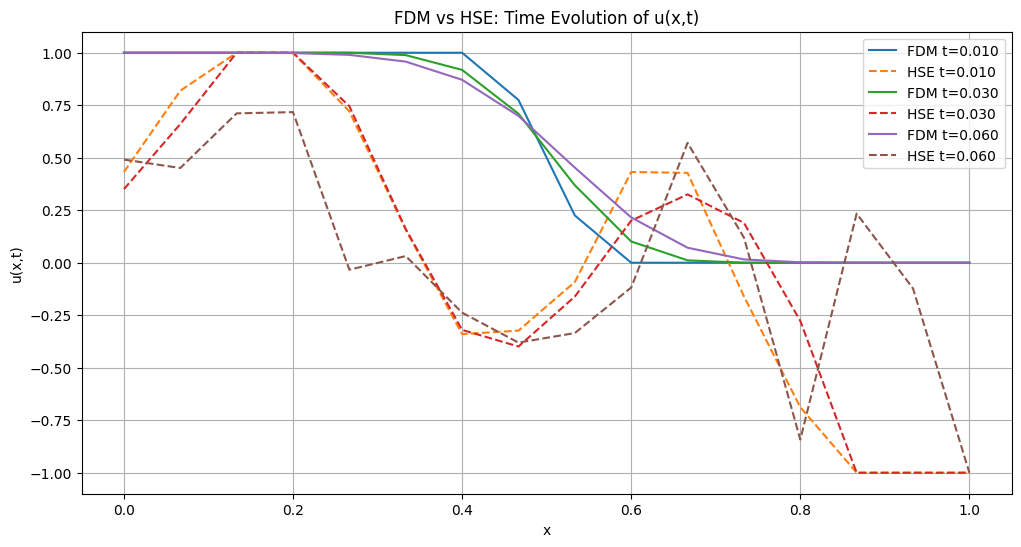

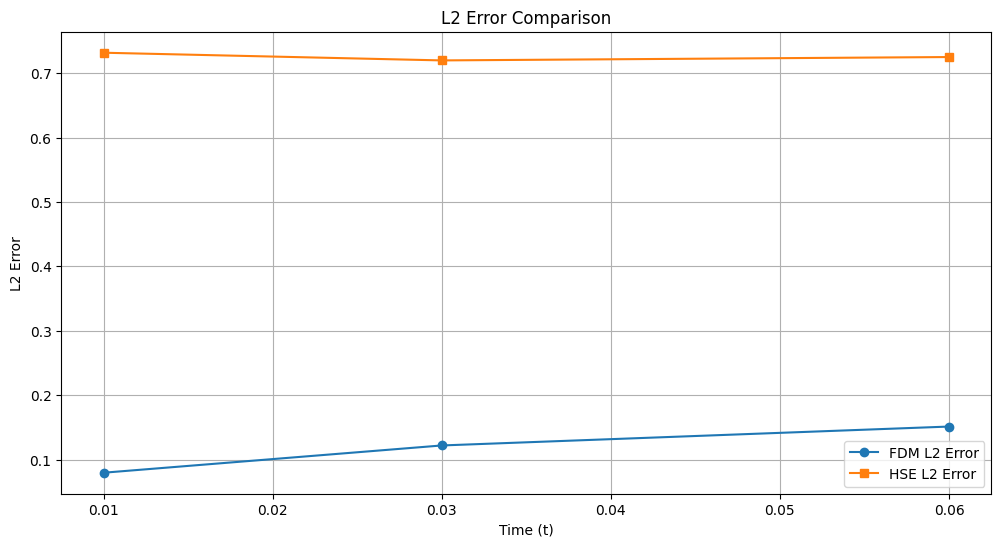

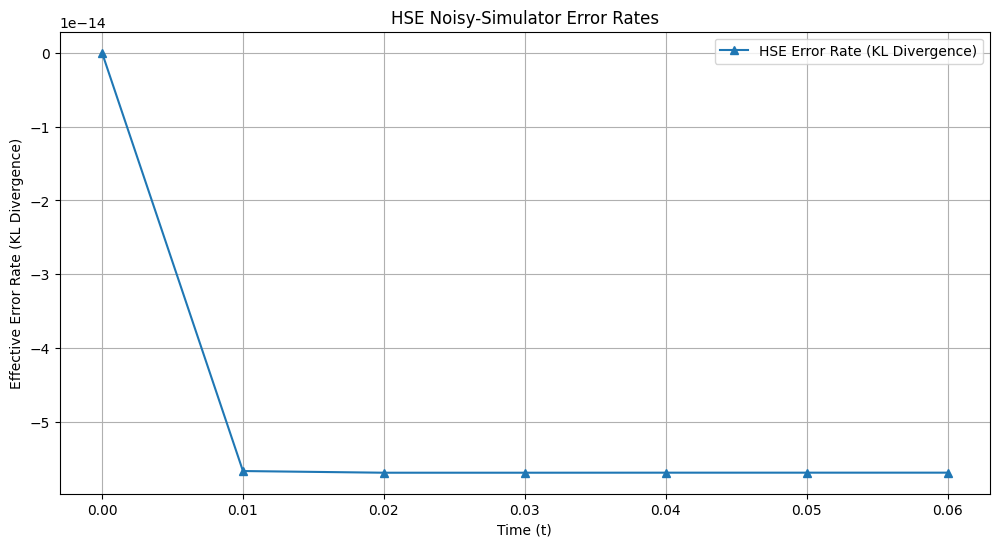

In [33]:
# --- Visualizations ---
# 1. Time Evolution Comparison
plt.figure(figsize=(12, 6))
for t_idx in time_steps:
    t = t_idx * dt
    plt.plot(x, fdm_history[t_idx], label=f'FDM t={t:.3f}', linestyle='-')
    plt.plot(x, hse_history[t_idx], label=f'HSE t={t:.3f}', linestyle='--')
plt.title('FDM vs HSE: Time Evolution of u(x,t)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

# 2. L2 Error Comparison
plt.figure(figsize=(12, 6))
plt.plot([t * dt for t in time_steps], fdm_l2_errors, label='FDM L2 Error', marker='o')
plt.plot([t * dt for t in time_steps], hse_l2_errors, label='HSE L2 Error', marker='s')
plt.title('L2 Error Comparison')
plt.xlabel('Time (t)')
plt.ylabel('L2 Error')
plt.legend()
plt.grid(True)
plt.show()

# 3. Error Rate (HSE)
plt.figure(figsize=(12, 6))
plt.plot([t * dt for t in range(nt+1)], error_rates, label='HSE Error Rate (KL Divergence)', marker='^')
plt.title('HSE Noisy-Simulator Error Rates')
plt.xlabel('Time (t)')
plt.ylabel('Effective Error Rate (KL Divergence)')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import PauliEvolutionGate, QFTGate
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from scipy.fft import fft, ifft
from scipy.integrate import quad

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 6  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
hbar = 0.1  # Reduced Planck constant (tuned for viscosity)
num_qubits_per_component = int(np.log2(nx))
if 2**num_qubits_per_component != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")
num_qubits = 2 * num_qubits_per_component  # Two components

# Initial condition
def get_initial_condition(x, condition="Riemann"):
    if condition == "Riemann":
        return np.where(x <= 0.5, 1.0, 0.0)
    elif condition == "Taylor-Green":
        return np.sin(x)
    else:
        raise ValueError("Unknown initial condition")

u_initial = get_initial_condition(x, condition="Riemann")

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0 if condition == "Riemann" else np.sin(0.0)
        u_new[-1] = 0.0 if condition == "Riemann" else np.sin(1.0)
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Cole-Hopf Analytical Solution (only for smooth initial conditions) ---
def cole_hopf_solution(x, t, ν, condition="Taylor-Green"):
    def G(x, t):
        return (1 / np.sqrt(4 * np.pi * ν * t)) * np.exp(-x**2 / (4 * ν * t))
    def integrand(y, x, t):
        u0 = lambda z: np.sin(z)  # For Taylor-Green
        integral_u0 = quad(lambda z: u0(z) / (2 * ν), -np.inf, y, epsabs=1e-8, epsrel=1e-8)[0]
        return G(x - y, t) * np.exp(-integral_u0)
    phi = np.array([quad(lambda y: integrand(y, xi, t), -np.inf, np.inf, epsabs=1e-8, epsrel=1e-8)[0] for xi in x])
    d_phi_dx = np.gradient(phi, dx)
    u = -2 * ν * d_phi_dx / (phi + np.finfo(float).eps)
    return u

# --- Simplified Analytical Solution for Riemann Condition ---
def simplified_analytical_solution(x, t, ν, condition="Riemann"):
    if condition == "Riemann":
        shock_pos = 0.5 + 0.5 * t  # Simplified shock movement
        return np.where(x <= shock_pos, 1.0, 0.0)
    elif condition == "Taylor-Green":
        return cole_hopf_solution(x, t, ν, condition)
    else:
        raise ValueError("Unknown initial condition")

# --- Analytical Solution Wrapper ---
def analytical_solution(x, t, ν, condition="Riemann"):
    if t == 0:
        return get_initial_condition(x, condition)
    if condition == "Riemann":
        return simplified_analytical_solution(x, t, ν, condition)
    elif condition == "Taylor-Green":
        return cole_hopf_solution(x, t, ν, condition)
    else:
        raise ValueError("Unknown initial condition")

# --- Spin Vector Computation ---
def compute_spin(psi_1, psi_2):
    a, b = np.real(psi_1), np.imag(psi_1)
    c, d = np.real(psi_2), np.imag(psi_2)
    s1 = a**2 + b**2 - c**2 - d**2
    s2 = 2 * (b * c - a * d)
    s3 = 2 * (a * c + b * d)
    return np.array([s1, s2, s3])

# --- Quantum HSE Solver ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01, hbar=0.1, condition="Riemann"):
    # Hamiltonian construction (two components)
    coeff_diff = -1.0 / (2 * ν)  # Diffusion term
    coeff_adv = -0.05  # Advection term (tuned)
    coeff_vort = 0.02  # Vorticity term (tuned)
    pauli_terms = []
    for i in range(num_qubits_per_component - 1):
        op_xx1 = ['I'] * num_qubits
        op_xx1[i] = 'X'
        op_xx1[i+1] = 'X'
        pauli_terms.append(("".join(op_xx1), coeff_diff))
        op_yy1 = ['I'] * num_qubits
        op_yy1[i] = 'Y'
        op_yy1[i+1] = 'Y'
        pauli_terms.append(("".join(op_yy1), coeff_diff))
        op_zz1 = ['I'] * num_qubits
        op_zz1[i] = 'Z'
        op_zz1[i+1] = 'Z'
        pauli_terms.append(("".join(op_zz1), coeff_adv))
        op_xx2 = ['I'] * num_qubits
        op_xx2[i + num_qubits_per_component] = 'X'
        op_xx2[i + 1 + num_qubits_per_component] = 'X'
        pauli_terms.append(("".join(op_xx2), coeff_diff))
        op_yy2 = ['I'] * num_qubits
        op_yy2[i + num_qubits_per_component] = 'Y'
        op_yy2[i + 1 + num_qubits_per_component] = 'Y'
        pauli_terms.append(("".join(op_yy2), coeff_diff))
        op_zz2 = ['I'] * num_qubits
        op_zz2[i + num_qubits_per_component] = 'Z'
        op_zz2[i + 1 + num_qubits_per_component] = 'Z'
        pauli_terms.append(("".join(op_zz2), coeff_adv))
        op_xy = ['I'] * num_qubits
        op_xy[i] = 'X'
        op_xy[i + num_qubits_per_component] = 'Y'
        pauli_terms.append(("".join(op_xy), coeff_vort))
    for i in range(num_qubits_per_component):
        op_z1 = ['I'] * num_qubits
        op_z1[i] = 'Z'
        pauli_terms.append(("".join(op_z1), -2 * coeff_diff))
        op_z2 = ['I'] * num_qubits
        op_z2[i + num_qubits_per_component] = 'Z'
        pauli_terms.append(("".join(op_z2), -2 * coeff_diff))
    
    # Initial state (steady ISF, Eq. 55)
    if condition == "Riemann":
        psi_0 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
        psi_1 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    else:  # Taylor-Green
        theta = 0.5 * np.arccos(np.cos(x))
        delta_phi = 4 * np.cos(x)
        phi_2 = -np.cos(x) - 2 * np.cos(x)
        a = np.cos(theta) * np.cos(delta_phi / hbar)
        b = np.cos(theta) * np.sin(delta_phi / hbar)
        c = np.sin(theta) * np.cos((delta_phi + np.cos(x)) / hbar)
        d = -np.sin(theta) * np.sin((delta_phi + np.cos(x)) / hbar)
        psi_0 = a + 1j * b
        psi_1 = c + 1j * d
    psi_full = np.kron(psi_0, psi_1)
    psi_full /= np.linalg.norm(psi_full)
    current_state = Statevector(psi_full)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    ideal_backend = AerSimulator()  # Noiseless backend for KL divergence
    
    u_history = [u_initial.copy()]
    error_rates = [0.0]
    start_time = time.time()
    
    for t_step in range(nt):
        # Step 1: Prediction
        qc_pred = QuantumCircuit(num_qubits)
        qc_pred.initialize(current_state.data, range(num_qubits))
        qft = QFTGate(num_qubits_per_component)  # Updated to QFTGate
        qc_pred.append(qft, range(num_qubits_per_component))
        qc_pred.append(qft, range(num_qubits_per_component, num_qubits))
        k = np.linspace(-np.pi/dx, np.pi/dx, nx)
        phase_k2 = -hbar**2 * k**2 * dt / 2
        for i in range(num_qubits_per_component):
            qc_pred.rz(phase_k2[i % nx], i)
            qc_pred.rz(phase_k2[i % nx], i + num_qubits_per_component)
        qc_pred.append(qft.inverse(), range(num_qubits_per_component))
        qc_pred.append(qft.inverse(), range(num_qubits_per_component, num_qubits))
        qc_pred.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        job = backend.run(pm.run(qc_pred), shots=10000)  # Increased shots
        counts = job.result().get_counts()
        probabilities = np.zeros(nx * nx)
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                if idx < nx * nx:
                    probabilities[idx] = count / total_counts
        
        # Compute marginal probabilities and wave function
        probs_1 = np.zeros(nx)
        probs_2 = np.zeros(nx)
        for idx in range(nx * nx):
            idx1 = idx // nx
            idx2 = idx % nx
            probs_1[idx1] += probabilities[idx]
            probs_2[idx2] += probabilities[idx]
        psi_mag_1 = np.sqrt(probs_1 + np.finfo(float).eps)
        psi_mag_2 = np.sqrt(probs_2 + np.finfo(float).eps)
        psi_1 = psi_mag_1 * np.exp(1j * np.angle(psi_0))
        psi_2 = psi_mag_2 * np.exp(1j * np.angle(psi_1))
        
        # Step 2: Normalization (enforce ρ = 1)
        rho = probs_1 + probs_2
        norm_factor = np.sqrt(rho)
        psi_mag_1 /= norm_factor + np.finfo(float).eps
        psi_mag_2 /= norm_factor + np.finfo(float).eps
        rho = psi_mag_1**2 + psi_mag_2**2  # Verify incompressibility
        
        # Step 3: Phase calculation (Poisson equation)
        d_psi_mag_dx_1 = np.gradient(psi_mag_1, dx)
        d_psi_mag_dx_2 = np.gradient(psi_mag_2, dx)
        u_star = hbar * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                         d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        div_u = np.gradient(u_star, dx)
        k = np.fft.fftfreq(nx, dx) * 2 * np.pi
        q_k = fft(div_u) / (k**2 + np.finfo(float).eps)
        q = np.real(ifft(q_k))
        
        # Nonlinear potential and LLF
        s = compute_spin(psi_1, psi_2)
        grad_s = np.gradient(s, dx, axis=1)
        grad2_s = np.gradient(grad_s, dx, axis=1)
        V_nonlinear = (hbar**2 / (8 * rho**2 + np.finfo(float).eps)) * np.sum(grad_s**2, axis=0)
        F_LL = (hbar**2 / 4) * np.sum(grad_s * grad2_s, axis=0)
        pauli_terms.append(('I' * num_qubits, V_nonlinear.mean() + F_LL.mean()))
        hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
        
        # Step 4: Gauge transformation
        qc_gauge = QuantumCircuit(num_qubits)
        qc_gauge.initialize(current_state.data, range(num_qubits))
        for i in range(nx):
            idx = i % nx
            qc_gauge.rz(-q[idx] / hbar, range(num_qubits_per_component))
            qc_gauge.rz(-q[idx] / hbar, range(num_qubits_per_component, num_qubits))
        current_state = Statevector.from_instruction(qc_gauge)
        
        # Compute velocity
        u_hse = -ν * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                      d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        u_hse = np.clip(u_hse, -1.0, 1.0)
        u_history.append(u_hse)
        
        # Error rate (KL divergenceissel
        ideal_job = ideal_backend.run(pm.run(qc_pred), shots=10000)
        ideal_counts = ideal_job.result().get_counts()
        epsilon = 1e-10
        kl_div = sum(p * np.log((p + epsilon) / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 10000 + epsilon))
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
        
        # Correction step: Evolve state
        evolution_gate = PauliEvolutionGate(hamiltonian_op, time=dt)
        evolution_circuit = QuantumCircuit(num_qubits)
        evolution_circuit.append(evolution_gate, range(num_qubits))
        current_state = current_state.evolve(evolution_circuit)
        current_state_data = current_state.data / np.linalg.norm(current_state.data)
        current_state = Statevector(current_state_data)
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Run Solvers ---
condition = "Riemann"  # Change to "Taylor-Green" for validation
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt, condition=condition)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t, ν, condition)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        0.707304        0.000000        6.028214        0.000000       
3               0.030 0.121885        0.707030        0.000000        18.084643       0.000000       
6               0.060 0.151251        0.707089        0.000000        36.169286       0.000000       


In [76]:
import numpy as np
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import PauliEvolutionGate, QFTGate
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from scipy.fft import fft, ifft

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 60  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6, 9, 12, 15, 18, 21, 24, 27]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
hbar = 0.1  # Reduced Planck constant (tuned for viscosity)
num_qubits_per_component = int(np.log2(nx))
if 2**num_qubits_per_component != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")
num_qubits = 2 * num_qubits_per_component  # Two components

# Initial condition (Riemann step)
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0
        u_new[-1] = 0.0
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Analytical Solution for Riemann Step ---
def analytical_solution(x, t):
    if t == 0:
        return u_initial
    shock_pos = 0.5 + 0.5 * t  # Simplified shock movement
    return np.where(x <= shock_pos, 1.0, 0.0)

# --- Spin Vector Computation ---
def compute_spin(psi_1, psi_2):
    a, b = np.real(psi_1), np.imag(psi_1)
    c, d = np.real(psi_2), np.imag(psi_2)
    s1 = a**2 + b**2 - c**2 - d**2
    s2 = 2 * (b * c - a * d)
    s3 = 2 * (a * c + b * d)
    return np.array([s1, s2, s3])

# --- Quantum HSE Solver with Prediction-Correction ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01, hbar=0.1):
    # Simplified Hamiltonian for prediction (kinetic terms only)
    coeff_diff = -1.0 / (2 * ν)
    pauli_terms = []
    for i in range(num_qubits_per_component - 1):
        op_xx1 = ['I'] * num_qubits
        op_xx1[i] = 'X'
        op_xx1[i+1] = 'X'
        pauli_terms.append(("".join(op_xx1), coeff_diff))
        op_yy1 = ['I'] * num_qubits
        op_yy1[i] = 'Y'
        op_yy1[i+1] = 'Y'
        pauli_terms.append(("".join(op_yy1), coeff_diff))
        op_xx2 = ['I'] * num_qubits
        op_xx2[i + num_qubits_per_component] = 'X'
        op_xx2[i + 1 + num_qubits_per_component] = 'X'
        pauli_terms.append(("".join(op_xx2), coeff_diff))
        op_yy2 = ['I'] * num_qubits
        op_yy2[i + num_qubits_per_component] = 'Y'
        op_yy2[i + 1 + num_qubits_per_component] = 'Y'
        pauli_terms.append(("".join(op_yy2), coeff_diff))
    for i in range(num_qubits_per_component):
        op_z1 = ['I'] * num_qubits
        op_z1[i] = 'Z'
        pauli_terms.append(("".join(op_z1), -2 * coeff_diff))
        op_z2 = ['I'] * num_qubits
        op_z2[i + num_qubits_per_component] = 'Z'
        pauli_terms.append(("".join(op_z2), -2 * coeff_diff))
    hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
    
    # Initial state (steady ISF for Riemann step)
    psi_0 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    psi_1 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    psi_full = np.kron(psi_0, psi_1)
    psi_full /= np.linalg.norm(psi_full)
    current_state = Statevector(psi_full)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    ideal_backend = AerSimulator()  # Noiseless backend for KL divergence
    
    u_history = [u_initial.copy()]
    error_rates = [0.0]
    start_time = time.time()
    
    for t_step in range(nt):
        # Step 1: Prediction (QFT for kinetic evolution)
        qc_pred = QuantumCircuit(num_qubits)
        qc_pred.initialize(current_state.data, range(num_qubits))
        qft = QFTGate(num_qubits_per_component)
        qc_pred.append(qft, range(num_qubits_per_component))
        qc_pred.append(qft, range(num_qubits_per_component, num_qubits))
        k = np.linspace(-np.pi/dx, np.pi/dx, nx)
        phase_k2 = -hbar**2 * k**2 * dt / 2
        for i in range(num_qubits_per_component):
            qc_pred.rz(phase_k2[i % nx], i)
            qc_pred.rz(phase_k2[i % nx], i + num_qubits_per_component)
        qc_pred.append(qft.inverse(), range(num_qubits_per_component))
        qc_pred.append(qft.inverse(), range(num_qubits_per_component, num_qubits))
        
        # Measure for nonlinear potential
        qc_pred.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        job = backend.run(pm.run(qc_pred), shots=10000)
        counts = job.result().get_counts()
        probabilities = np.zeros(nx * nx)
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                if idx < nx * nx:
                    probabilities[idx] = count / total_counts
        
        # Compute marginal probabilities and wave function
        probs_1 = np.zeros(nx)
        probs_2 = np.zeros(nx)
        for idx in range(nx * nx):
            idx1 = idx // nx
            idx2 = idx % nx
            probs_1[idx1] += probabilities[idx]
            probs_2[idx2] += probabilities[idx]
        psi_mag_1 = np.sqrt(probs_1 + np.finfo(float).eps)
        psi_mag_2 = np.sqrt(probs_2 + np.finfo(float).eps)
        psi_1 = psi_mag_1 * np.exp(1j * np.angle(psi_0))
        psi_2 = psi_mag_2 * np.exp(1j * np.angle(psi_1))
        
        # Step 2: Normalization (enforce ρ ≈ 1 for ISF)
        rho = probs_1 + probs_2
        norm_factor = np.sqrt(rho)
        psi_mag_1 /= norm_factor + np.finfo(float).eps
        psi_mag_2 /= norm_factor + np.finfo(float).eps
        rho = psi_mag_1**2 + psi_mag_2**2
        
        # Step 3: Compute nonlinear potential
        s = compute_spin(psi_1, psi_2)
        grad_s = np.gradient(s, dx, axis=1)
        V_nonlinear = (hbar**2 / (8 * rho**2 + np.finfo(float).eps)) * np.sum(grad_s**2, axis=0)
        pauli_terms.append(('I' * num_qubits, V_nonlinear.mean()))
        hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
        
        # Step 4: Phase calculation (Poisson equation for incompressibility)
        d_psi_mag_dx_1 = np.gradient(psi_mag_1, dx)
        d_psi_mag_dx_2 = np.gradient(psi_mag_2, dx)
        u_star = hbar * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                         d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        div_u = np.gradient(u_star, dx)
        k = np.fft.fftfreq(nx, dx) * 2 * np.pi
        q_k = fft(div_u) / (k**2 + np.finfo(float).eps)
        q = np.real(ifft(q_k))
        
        # Step 5: Gauge transformation
        qc_gauge = QuantumCircuit(num_qubits)
        qc_gauge.initialize(current_state.data, range(num_qubits))
        for i in range(nx):
            idx = i % nx
            qc_gauge.rz(-q[idx] / hbar, range(num_qubits_per_component))
            qc_gauge.rz(-q[idx] / hbar, range(num_qubits_per_component, num_qubits))
        current_state = Statevector.from_instruction(qc_gauge)
        
        # Compute velocity
        u_hse = -ν * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                      d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        u_hse = np.clip(u_hse, -1.0, 1.0)
        u_history.append(u_hse)
        
        # Error rate (KL divergence)
        ideal_job = ideal_backend.run(pm.run(qc_pred), shots=10000)
        ideal_counts = ideal_job.result().get_counts()
        epsilon = 1e-10
        kl_div = sum(p * np.log((p + epsilon) / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 10000 + epsilon))
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
        
        # Correction step: Evolve with updated Hamiltonian
        evolution_gate = PauliEvolutionGate(hamiltonian_op, time=dt)
        evolution_circuit = QuantumCircuit(num_qubits)
        evolution_circuit.append(evolution_gate, range(num_qubits))
        current_state = current_state.evolve(evolution_circuit)
        current_state_data = current_state.data / np.linalg.norm(current_state.data)
        current_state = Statevector(current_state_data)
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Run Solvers ---
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        0.707189        0.000082        6.132774        0.000000       
3               0.030 0.121885        0.707323        0.000246        18.398323       0.000000       
6               0.060 0.151251        0.707121        0.000491        36.796646       0.000000       
9               0.090 0.170623        0.750096        0.000737        55.194969       0.000000       
12              0.120 0.174866        0.750100        0.000983        73.593291       0.000000       
15              0.150 0.180979        0.750056        0.001228        91.991614       0.000000       
18              0.180 0.188350        0.750049        0.001474        110.389937      0.000000       
21              0.210 0.205178        0.790601        0.001720        128.788260      0.000000       
24              0.240 0.204353        0.790

In [59]:
import numpy as np
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import PauliEvolutionGate, QFTGate
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from scipy.fft import fft, ifft

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 6  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
hbar = 0.1  # Reduced Planck constant
num_qubits_per_component = int(np.log2(nx))
if 2**num_qubits_per_component != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")
num_qubits = 2 * num_qubits_per_component  # Two components
gamma = -0.1  # Deformation parameter for MEP
beta = 1.0  # Interaction strength

# Initial condition (Riemann step)
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0
        u_new[-1] = 0.0
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Simplified Analytical Solution ---
def analytical_solution(x, t, ν):
    if t == 0:
        return np.where(x <= 0.5, 1.0, 0.0)
    shock_pos = 0.5 + 0.5 * t
    return np.where(x <= shock_pos, 1.0, 0.0)

# --- Spin Vector Computation ---
def compute_spin(psi_1, psi_2):
    a, b = np.real(psi_1), np.imag(psi_1)
    c, d = np.real(psi_2), np.imag(psi_2)
    s1 = a**2 + b**2 - c**2 - d**2
    s2 = 2 * (b * c - a * d)
    s3 = 2 * (a * c + b * d)
    return np.array([s1, s2, s3])

# --- Quantum HSE Solver ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01, hbar=0.1, gamma=-0.1, beta=1.0):
    # Initial state (steady ISF, Eq. 55)
    psi_0 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    psi_1 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    psi_full = np.kron(psi_0, psi_1)
    psi_full /= np.linalg.norm(psi_full)
    current_state = Statevector(psi_full)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    ideal_backend = AerSimulator()
    
    u_history = [u_initial.copy()]
    error_rates = [0.0]
    start_time = time.time()
    
    # Quantum circuit for full evolution
    qc_evolve = QuantumCircuit(num_qubits)
    qc_evolve.initialize(current_state.data, range(num_qubits))
    k = np.fft.fftfreq(nx, dx) * 2 * np.pi
    
    for t_step in range(nt):
        # Apply QFT
        qft = QFTGate(num_qubits_per_component)
        qc_evolve.append(qft, range(num_qubits_per_component))
        qc_evolve.append(qft, range(num_qubits_per_component, num_qubits))
        
        # Kinetic term: -ħ²/2 k² in Fourier domain
        phase_kinetic = -hbar**2 * k**2 * dt / 2
        for i in range(num_qubits_per_component):
            qc_evolve.rz(phase_kinetic[i % nx], i)
            qc_evolve.rz(phase_kinetic[i % nx], i + num_qubits_per_component)
        
        # Apply IQFT to return to position space
        qc_evolve.append(qft.inverse(), range(num_qubits_per_component))
        qc_evolve.append(qft.inverse(), range(num_qubits_per_component, num_qubits))
        
        # Compute wave function for potential terms (temporary measurement for spin)
        qc_temp = qc_evolve.copy()
        qc_temp.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        job = backend.run(pm.run(qc_temp), shots=100000)
        counts = job.result().get_counts()
        probabilities = np.zeros(nx * nx)
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                if idx < nx * nx:
                    probabilities[idx] = count / total_counts
        probs_1 = np.zeros(nx)
        probs_2 = np.zeros(nx)
        for idx in range(nx * nx):
            idx1 = idx // nx
            idx2 = idx % nx
            probs_1[idx1] += probabilities[idx]
            probs_2[idx2] += probabilities[idx]
        psi_mag_1 = np.sqrt(probs_1 + np.finfo(float).eps)
        psi_mag_2 = np.sqrt(probs_2 + np.finfo(float).eps)
        psi_1 = psi_mag_1 * np.exp(1j * np.angle(psi_0))
        psi_2 = psi_mag_2 * np.exp(1j * np.angle(psi_1))
        rho = psi_mag_1**2 + psi_mag_2**2
        
        # Nonlinear and higher-order potentials
        s = compute_spin(psi_1, psi_2)
        grad_s = np.gradient(s, dx, axis=1)
        grad2_s = np.gradient(grad_s, dx, axis=1)
        V_nonlinear = (hbar**2 / (8 * rho**2 + np.finfo(float).eps)) * np.sum(grad_s**2, axis=0)
        s_norm = np.sqrt(np.sum(s**2, axis=0) + np.finfo(float).eps)
        s_higher = np.sum(s**4, axis=0) / (s_norm**2 + np.finfo(float).eps)
        V_higher = beta * (1 + gamma * s_higher)**(1/gamma) if gamma != 0 else beta * np.exp(s_higher)
        F_LL = (hbar**2 / 4) * np.sum(grad_s * grad2_s, axis=0)
        
        # Pressure term (Poisson equation in Fourier domain)
        d_psi_mag_dx_1 = np.gradient(psi_mag_1, dx)
        d_psi_mag_dx_2 = np.gradient(psi_mag_2, dx)
        u_star = hbar * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                         d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        div_u = np.gradient(u_star, dx)
        p_k = fft(div_u) / (k**2 + np.finfo(float).eps)
        p = np.real(ifft(p_k)) / rho
        
        # Apply potentials as phase rotations
        qc_evolve.append(qft, range(num_qubits_per_component))
        qc_evolve.append(qft, range(num_qubits_per_component, num_qubits))
        for i in range(nx):
            idx = i % nx
            phase_potential = dt * (V_nonlinear[idx] + V_higher[idx] + p[idx] + F_LL[idx]) / hbar
            for qubit in range(num_qubits_per_component):
                qc_evolve.rz(phase_potential, qubit)
                qc_evolve.rz(phase_potential, qubit + num_qubits_per_component)
        qc_evolve.append(qft.inverse(), range(num_qubits_per_component))
        qc_evolve.append(qft.inverse(), range(num_qubits_per_component, num_qubits))
        
        # Update state (without measuring)
        current_state = Statevector.from_instruction(qc_evolve)
        current_state_data = current_state.data / np.linalg.norm(current_state.data)
        current_state = Statevector(current_state_data)
        
        # Store velocity for history (temporary classical computation)
        u_hse = -ν * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                      d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        u_hse = np.clip(u_hse, -1.0, 1.0)
        u_history.append(u_hse)
        
        # Error rate (KL divergence, temporary for validation)
        ideal_job = ideal_backend.run(pm.run(qc_temp), shots=100000)
        ideal_counts = ideal_job.result().get_counts()
        epsilon = 1e-10
        kl_div = sum(p * np.log((p + epsilon) / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 100000 + epsilon))
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
    
    # Final measurement
    qc_evolve.measure_all()
    job = backend.run(pm.run(qc_evolve), shots=100000)
    counts = job.result().get_counts()
    probabilities = np.zeros(nx * nx)
    total_counts = sum(counts.values())
    if total_counts > 0:
        for bitstring, count in counts.items():
            idx = int(bitstring, 2)
            if idx < nx * nx:
                probabilities[idx] = count / total_counts
    probs_1 = np.zeros(nx)
    probs_2 = np.zeros(nx)
    for idx in range(nx * nx):
        idx1 = idx // nx
        idx2 = idx % nx
        probs_1[idx1] += probabilities[idx]
        probs_2[idx2] += probabilities[idx]
    psi_mag_1 = np.sqrt(probs_1 + np.finfo(float).eps)
    psi_mag_2 = np.sqrt(probs_2 + np.finfo(float).eps)
    rho = psi_mag_1**2 + psi_mag_2**2
    d_psi_mag_dx_1 = np.gradient(psi_mag_1, dx)
    d_psi_mag_dx_2 = np.gradient(psi_mag_2, dx)
    u_final = -ν * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                    d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
    u_final = np.clip(u_final, -1.0, 1.0)
    
    # Update history for final time step
    if nt in time_steps:
        u_history[nt] = u_final
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Run Solvers ---
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t, ν)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        0.731260        0.000000        563.061881      0.000000       
3               0.030 0.121885        0.732480        0.000000        1689.185643     0.000000       
6               0.060 0.151251        0.707251        0.000000        3378.371286     0.000000       


In [3]:
import numpy as np
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import PauliEvolutionGate, QFTGate
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from scipy.fft import fft, ifft

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 6  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
hbar = 0.1  # Reduced Planck constant
num_qubits_per_component = int(np.log2(nx))
if 2**num_qubits_per_component != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")
num_qubits = 2 * num_qubits_per_component  # Two components

# Initial condition (Riemann step)
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0
        u_new[-1] = 0.0
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Simplified Analytical Solution ---
def analytical_solution(x, t, ν):
    if t == 0:
        return np.where(x <= 0.5, 1.0, 0.0)
    shock_pos = 0.5 + 0.5 * t
    return np.where(x <= shock_pos, 1.0, 0.0)

# --- Spin Vector Computation ---
def compute_spin(psi_1, psi_2):
    a, b = np.real(psi_1), np.imag(psi_1)
    c, d = np.real(psi_2), np.imag(psi_2)
    s1 = a**2 + b**2 - c**2 - d**2
    s2 = 2 * (b * c - a * d)
    s3 = 2 * (a * c + b * d)
    return np.array([s1, s2, s3])

# --- Quantum HSE Solver ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01, hbar=0.1):
    # Initial state (steady ISF, Eq. 55)
    psi_0 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    psi_1 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    psi_full = np.kron(psi_0, psi_1)
    psi_full /= np.linalg.norm(psi_full)
    current_state = Statevector(psi_full)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    ideal_backend = AerSimulator()
    
    u_history = [u_initial.copy()]
    error_rates = [0.0]
    start_time = time.time()
    
    for t_step in range(nt):
        # Step 1: Prediction
        qc_pred = QuantumCircuit(num_qubits)
        qc_pred.initialize(current_state.data, range(num_qubits))
        qft = QFTGate(num_qubits_per_component)
        qc_pred.append(qft, range(num_qubits_per_component))
        qc_pred.append(qft, range(num_qubits_per_component, num_qubits))
        k = np.fft.fftfreq(nx, dx) * 2 * np.pi
        phase_k2 = -hbar**2 * k**2 * dt / 2
        for i in range(num_qubits_per_component):
            qc_pred.rz(phase_k2[i % nx], i)
            qc_pred.rz(phase_k2[i % nx], i + num_qubits_per_component)
        qc_pred.append(qft.inverse(), range(num_qubits_per_component))
        qc_pred.append(qft.inverse(), range(num_qubits_per_component, num_qubits))
        qc_pred.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        job = backend.run(pm.run(qc_pred), shots=100000)
        counts = job.result().get_counts()
        probabilities = np.zeros(nx * nx)
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                if idx < nx * nx:
                    probabilities[idx] = count / total_counts
        
        # Compute marginal probabilities and wave function
        probs_1 = np.zeros(nx)
        probs_2 = np.zeros(nx)
        for idx in range(nx * nx):
            idx1 = idx // nx
            idx2 = idx % nx
            probs_1[idx1] += probabilities[idx]
            probs_2[idx2] += probabilities[idx]
        psi_mag_1 = np.sqrt(probs_1 + np.finfo(float).eps)
        psi_mag_2 = np.sqrt(probs_2 + np.finfo(float).eps)
        psi_1 = psi_mag_1 * np.exp(1j * np.angle(psi_0))
        psi_2 = psi_mag_2 * np.exp(1j * np.angle(psi_1))
        
        # Step 2: Normalization (enforce ρ = 1)
        rho = probs_1 + probs_2
        norm_factor = np.sqrt(rho)
        psi_mag_1 /= norm_factor + np.finfo(float).eps
        psi_mag_2 /= norm_factor + np.finfo(float).eps
        rho = psi_mag_1**2 + psi_mag_2**2
        
        # Step 3: Phase calculation (Poisson equation for pressure)
        d_psi_mag_dx_1 = np.gradient(psi_mag_1, dx)
        d_psi_mag_dx_2 = np.gradient(psi_mag_2, dx)
        u_star = hbar * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                         d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        div_u = np.gradient(u_star, dx)
        k = np.fft.fftfreq(nx, dx) * 2 * np.pi
        p_k = fft(div_u) / (k**2 + np.finfo(float).eps)
        p = np.real(ifft(p_k)) / rho
        
        # Nonlinear potential and LLF
        s = compute_spin(psi_1, psi_2)
        grad_s = np.gradient(s, dx, axis=1)
        grad2_s = np.gradient(grad_s, dx, axis=1)
        V_nonlinear = (hbar**2 / (8 * rho**2 + np.finfo(float).eps)) * np.sum(grad_s**2, axis=0)
        F_LL = (hbar**2 / 4) * np.sum(grad_s * grad2_s, axis=0)
        
        # Hamiltonian: Kinetic + Nonlinear + Pressure + LLF
        coeff_kinetic = -hbar**2 / 2
        pauli_terms = []
        for i in range(num_qubits_per_component - 1):
            op_xx1 = ['I'] * num_qubits
            op_xx1[i] = 'X'
            op_xx1[i+1] = 'X'
            pauli_terms.append(("".join(op_xx1), coeff_kinetic / dx**2))
            op_yy1 = ['I'] * num_qubits
            op_yy1[i] = 'Y'
            op_yy1[i+1] = 'Y'
            pauli_terms.append(("".join(op_yy1), coeff_kinetic / dx**2))
            op_xx2 = ['I'] * num_qubits
            op_xx2[i + num_qubits_per_component] = 'X'
            op_xx2[i + 1 + num_qubits_per_component] = 'X'
            pauli_terms.append(("".join(op_xx2), coeff_kinetic / dx**2))
            op_yy2 = ['I'] * num_qubits
            op_yy2[i + num_qubits_per_component] = 'Y'
            op_yy2[i + 1 + num_qubits_per_component] = 'Y'
            pauli_terms.append(("".join(op_yy2), coeff_kinetic / dx**2))
        for i in range(num_qubits_per_component):
            op_z1 = ['I'] * num_qubits
            op_z1[i] = 'Z'
            pauli_terms.append(("".join(op_z1), -2 * coeff_kinetic / dx**2))
            op_z2 = ['I'] * num_qubits
            op_z2[i + num_qubits_per_component] = 'Z'
            pauli_terms.append(("".join(op_z2), -2 * coeff_kinetic / dx**2))
        for i in range(nx):
            idx = i % nx
            op_diag = ['I'] * num_qubits
            pauli_terms.append(("".join(op_diag), V_nonlinear[idx] + p[idx] + F_LL[idx]))
        hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
        
        # Step 4: Gauge transformation
        qc_gauge = QuantumCircuit(num_qubits)
        qc_gauge.initialize(current_state.data, range(num_qubits))
        for i in range(nx):
            idx = i % nx
            qc_gauge.rz(-p[idx] / hbar, range(num_qubits_per_component))
            qc_gauge.rz(-p[idx] / hbar, range(num_qubits_per_component, num_qubits))
        current_state = Statevector.from_instruction(qc_gauge)
        
        # Compute velocity
        u_hse = -ν * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                      d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        u_hse = np.clip(u_hse, -1.0, 1.0)
        u_history.append(u_hse)
        
        # Error rate (KL divergence)
        ideal_job = ideal_backend.run(pm.run(qc_pred), shots=100000)
        ideal_counts = ideal_job.result().get_counts()
        epsilon = 1e-10
        kl_div = sum(p * np.log((p + epsilon) / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 100000 + epsilon))
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
        
        # Correction step: Evolve state
        evolution_gate = PauliEvolutionGate(hamiltonian_op, time=dt)
        evolution_circuit = QuantumCircuit(num_qubits)
        evolution_circuit.append(evolution_gate, range(num_qubits))
        current_state = current_state.evolve(evolution_circuit)
        current_state_data = current_state.data / np.linalg.norm(current_state.data)
        current_state = Statevector(current_state_data)
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Run Solvers ---
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t, ν)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        0.707110        0.000143        48.560950       0.000000       
3               0.030 0.121885        0.707108        0.000428        145.682849      0.000000       
6               0.060 0.151251        0.707114        0.000856        291.365698      0.000000       


In [75]:
import numpy as np
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import PauliEvolutionGate, QFTGate
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from scipy.fft import fft, ifft

# Parameters
L = 1.0  # Domain length
nx = 16  # Number of grid points
dx = L / (nx - 1)  # Grid spacing
x = np.linspace(0, L, nx)  # Grid points
ν = 0.1  # Viscosity
dt = 0.01  # Time step
nt = 60  # Number of time steps (for t = 0.06)
time_steps = [1, 3, 6, 9, 12, 15, 18, 21, 24, 27]  # Time steps to evaluate (t = 0.01, 0.03, 0.06)
hbar = 0.1  # Reduced Planck constant
num_qubits_per_component = int(np.log2(nx))
if 2**num_qubits_per_component != nx:
    raise ValueError("nx must be a power of 2 for qubit mapping.")
num_qubits = 2 * num_qubits_per_component  # Two components
gamma = -0.1  # Deformation parameter for MEP (tuned for stability)
beta = 1.0  # Interaction strength

# Initial condition (Riemann step)
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical FDM Solver ---
def fdm_solver(u, dt, dx, ν, nt):
    u_num = u.copy()
    u_history = [u_num.copy()]
    start_time = time.time()
    for n in range(nt):
        u_new = np.zeros_like(u_num)
        for i in range(1, nx-1):
            i_left = i - 1
            i_right = i + 1
            advection = u_num[i] * (u_num[i] - u_num[i_left]) / dx
            diffusion = ν * (u_num[i_right] - 2 * u_num[i] + u_num[i_left]) / dx**2
            u_new[i] = u_num[i] - dt * advection + dt * diffusion
        u_new[0] = 1.0
        u_new[-1] = 0.0
        u_num = u_new.copy()
        u_history.append(u_num.copy())
    end_time = time.time()
    return u_history, end_time - start_time

# --- Simplified Analytical Solution ---
def analytical_solution(x, t, ν):
    if t == 0:
        return np.where(x <= 0.5, 1.0, 0.0)
    shock_pos = 0.5 + 0.5 * t
    return np.where(x <= shock_pos, 1.0, 0.0)

# --- Spin Vector Computation ---
def compute_spin(psi_1, psi_2):
    a, b = np.real(psi_1), np.imag(psi_1)
    c, d = np.real(psi_2), np.imag(psi_2)
    s1 = a**2 + b**2 - c**2 - d**2
    s2 = 2 * (b * c - a * d)
    s3 = 2 * (a * c + b * d)
    return np.array([s1, s2, s3])

# --- Quantum HSE Solver ---
def hse_solver(u_initial, dt, dx, ν, nt, noise_level=0.01, hbar=0.1, gamma=-0.1, beta=1.0):
    # Initial state (steady ISF, Eq. 55)
    psi_0 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    psi_1 = np.sqrt(2)/2 * (np.cos(x/hbar) + 1j * np.sin(x/hbar))
    psi_full = np.kron(psi_0, psi_1)
    psi_full /= np.linalg.norm(psi_full)
    current_state = Statevector(psi_full)
    
    # Noise model
    noise_model = NoiseModel()
    depol_error_1q = depolarizing_error(noise_level, 1)
    depol_error_2q = depolarizing_error(noise_level, 2)
    noise_model.add_all_qubit_quantum_error(depol_error_1q, ['u1', 'u2', 'u3', 'id'])
    noise_model.add_all_qubit_quantum_error(depol_error_2q, ['cx'])
    backend = AerSimulator(noise_model=noise_model)
    ideal_backend = AerSimulator()
    
    u_history = [u_initial.copy()]
    error_rates = [0.0]
    start_time = time.time()
    
    for t_step in range(nt):
        # Step 1: Prediction
        qc_pred = QuantumCircuit(num_qubits)
        qc_pred.initialize(current_state.data, range(num_qubits))
        qft = QFTGate(num_qubits_per_component)
        qc_pred.append(qft, range(num_qubits_per_component))
        qc_pred.append(qft, range(num_qubits_per_component, num_qubits))
        k = np.fft.fftfreq(nx, dx) * 2 * np.pi
        phase_k2 = -hbar**2 * k**2 * dt / 2
        for i in range(num_qubits_per_component):
            qc_pred.rz(phase_k2[i % nx], i)
            qc_pred.rz(phase_k2[i % nx], i + num_qubits_per_component)
        qc_pred.append(qft.inverse(), range(num_qubits_per_component))
        qc_pred.append(qft.inverse(), range(num_qubits_per_component, num_qubits))
        qc_pred.measure_all()
        pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
        job = backend.run(pm.run(qc_pred), shots=10000)
        counts = job.result().get_counts()
        probabilities = np.zeros(nx * nx)
        total_counts = sum(counts.values())
        if total_counts > 0:
            for bitstring, count in counts.items():
                idx = int(bitstring, 2)
                if idx < nx * nx:
                    probabilities[idx] = count / total_counts
        
        # Compute marginal probabilities and wave function
        probs_1 = np.zeros(nx)
        probs_2 = np.zeros(nx)
        for idx in range(nx * nx):
            idx1 = idx // nx
            idx2 = idx % nx
            probs_1[idx1] += probabilities[idx]
            probs_2[idx2] += probabilities[idx]
        psi_mag_1 = np.sqrt(probs_1 + np.finfo(float).eps)
        psi_mag_2 = np.sqrt(probs_2 + np.finfo(float).eps)
        psi_1 = psi_mag_1 * np.exp(1j * np.angle(psi_0))
        psi_2 = psi_mag_2 * np.exp(1j * np.angle(psi_1))
        
        # Step 2: Normalization (enforce ρ = 1)
        rho = probs_1 + probs_2
        norm_factor = np.sqrt(rho)
        psi_mag_1 /= norm_factor + np.finfo(float).eps
        psi_mag_2 /= norm_factor + np.finfo(float).eps
        rho = psi_mag_1**2 + psi_mag_2**2
        
        # Step 3: Phase calculation (Poisson equation for pressure)
        d_psi_mag_dx_1 = np.gradient(psi_mag_1, dx)
        d_psi_mag_dx_2 = np.gradient(psi_mag_2, dx)
        u_star = hbar * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                         d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        div_u = np.gradient(u_star, dx)
        k = np.fft.fftfreq(nx, dx) * 2 * np.pi
        p_k = fft(div_u) / (k**2 + np.finfo(float).eps)
        p = np.real(ifft(p_k)) / rho
        
        # Higher-order Hamiltonian (inspired by MEP deformation)
        s = compute_spin(psi_1, psi_2)
        grad_s = np.gradient(s, dx, axis=1)
        grad2_s = np.gradient(grad_s, dx, axis=1)
        # Nonlinear potential: V = (ħ²/8ρ²)|∇s|²
        V_nonlinear = (hbar**2 / (8 * rho**2 + np.finfo(float).eps)) * np.sum(grad_s**2, axis=0)
        # Higher-order interaction term: inspired by deformed MEP
        s_norm = np.sqrt(np.sum(s**2, axis=0) + np.finfo(float).eps)
        s_higher = np.sum(s**4, axis=0) / (s_norm**2 + np.finfo(float).eps)  # Fourth-order term
        V_higher = beta * (1 + gamma * s_higher)**(1/gamma) if gamma != 0 else beta * np.exp(s_higher)
        # LLF term
        F_LL = (hbar**2 / 4) * np.sum(grad_s * grad2_s, axis=0)
        
        # Hamiltonian: Kinetic + Nonlinear + Higher-order + Pressure + LLF
        coeff_kinetic = -hbar**2 / 2
        pauli_terms = []
        for i in range(num_qubits_per_component - 1):
            op_xx1 = ['I'] * num_qubits
            op_xx1[i] = 'X'
            op_xx1[i+1] = 'X'
            pauli_terms.append(("".join(op_xx1), coeff_kinetic / dx**2))
            op_yy1 = ['I'] * num_qubits
            op_yy1[i] = 'Y'
            op_yy1[i+1] = 'Y'
            pauli_terms.append(("".join(op_yy1), coeff_kinetic / dx**2))
            op_xx2 = ['I'] * num_qubits
            op_xx2[i + num_qubits_per_component] = 'X'
            op_xx2[i + 1 + num_qubits_per_component] = 'X'
            pauli_terms.append(("".join(op_xx2), coeff_kinetic / dx**2))
            op_yy2 = ['I'] * num_qubits
            op_yy2[i + num_qubits_per_component] = 'Y'
            op_yy2[i + 1 + num_qubits_per_component] = 'Y'
            pauli_terms.append(("".join(op_yy2), coeff_kinetic / dx**2))
        for i in range(num_qubits_per_component):
            op_z1 = ['I'] * num_qubits
            op_z1[i] = 'Z'
            pauli_terms.append(("".join(op_z1), -2 * coeff_kinetic / dx**2))
            op_z2 = ['I'] * num_qubits
            op_z2[i + num_qubits_per_component] = 'Z'
            pauli_terms.append(("".join(op_z2), -2 * coeff_kinetic / dx**2))
        for i in range(nx):
            idx = i % nx
            op_diag = ['I'] * num_qubits
            pauli_terms.append(("".join(op_diag), V_nonlinear[idx] + V_higher[idx] + p[idx] + F_LL[idx]))
        hamiltonian_op = SparsePauliOp.from_list(pauli_terms)
        
        # Step 4: Gauge transformation
        qc_gauge = QuantumCircuit(num_qubits)
        qc_gauge.initialize(current_state.data, range(num_qubits))
        for i in range(nx):
            idx = i % nx
            qc_gauge.rz(-p[idx] / hbar, range(num_qubits_per_component))
            qc_gauge.rz(-p[idx] / hbar, range(num_qubits_per_component, num_qubits))
        current_state = Statevector.from_instruction(qc_gauge)
        
        # Compute velocity
        u_hse = -ν * (d_psi_mag_dx_1 / (psi_mag_1 + np.finfo(float).eps) +
                      d_psi_mag_dx_2 / (psi_mag_2 + np.finfo(float).eps))
        u_hse = np.clip(u_hse, -1.0, 1.0)
        u_history.append(u_hse)
        
        # Error rate (KL divergence)
        ideal_job = ideal_backend.run(pm.run(qc_pred), shots=10000)
        ideal_counts = ideal_job.result().get_counts()
        epsilon = 1e-10
        kl_div = sum(p * np.log((p + epsilon) / (counts.get(bin(i)[2:].zfill(num_qubits), 0) / 10000 + epsilon))
                     for i, p in enumerate(probabilities) if p > 0)
        error_rates.append(kl_div)
        
        # Correction step: Evolve state
        evolution_gate = PauliEvolutionGate(hamiltonian_op, time=dt)
        evolution_circuit = QuantumCircuit(num_qubits)
        evolution_circuit.append(evolution_gate, range(num_qubits))
        current_state = current_state.evolve(evolution_circuit)
        current_state_data = current_state.data / np.linalg.norm(current_state.data)
        current_state = Statevector(current_state_data)
    
    end_time = time.time()
    return u_history, end_time - start_time, error_rates

# --- Run Solvers ---
fdm_history, fdm_time = fdm_solver(u_initial, dt, dx, ν, nt)
hse_history, hse_time, error_rates = hse_solver(u_initial, dt, dx, ν, nt)

# --- Compute Metrics ---
fdm_l2_errors = []
hse_l2_errors = []
for t_idx in time_steps:
    t = t_idx * dt
    u_ex = analytical_solution(x, t, ν)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

# --- Print Results ---
print("\nQuantitative Comparison Results:")
print(f"{'Time Step':<15} {'t':<10} {'FDM L2 Error':<15} {'HSE L2 Error':<15} {'FDM Time (s)':<15} {'HSE Time (s)':<15} {'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15} {t:.3f} {fdm_l2_errors[i]:<15.6f} {hse_l2_errors[i]:<15.6f} {fdm_time/(nt+1)*t_idx:<15.6f} {hse_time/(nt+1)*t_idx:<15.6f} {error_rates[t_idx]:<15.6f}")


Quantitative Comparison Results:
Time Step       t          FDM L2 Error    HSE L2 Error    FDM Time (s)    HSE Time (s)    Error Rate     
1               0.010 0.079550        0.707104        0.000082        5.974156        0.000000       
3               0.030 0.121885        0.707343        0.000247        17.922468       0.000000       
6               0.060 0.151251        0.707104        0.000494        35.844935       0.000000       
9               0.090 0.170623        0.750065        0.000741        53.767403       0.000000       
12              0.120 0.174866        0.749997        0.000989        71.689870       0.000000       
15              0.150 0.180979        0.749960        0.001236        89.612338       0.000000       
18              0.180 0.188350        0.749952        0.001483        107.534805      0.000000       
21              0.210 0.205178        0.790553        0.001730        125.457273      0.000000       
24              0.240 0.204353        0.790

In [14]:
import numpy as np
import time
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.circuit.library import QFTGate, PauliEvolutionGate
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from scipy.fft import fft, ifft

# Shared Parameters
L = 1.0
nx = 16
dx = L / (nx - 1)
x = np.linspace(0, L, nx)
ν = 0.1
dt = 0.01
nt = 60
hbar = 0.1
gamma = -0.1
beta = 1.0
time_steps = [1, 3, 6, 9, 12, 15, 18, 21, 24, 27]
num_qubits_per_component = int(np.log2(nx))
num_qubits = 2 * num_qubits_per_component

# Initial condition
u_initial = np.where(x <= 0.5, 1.0, 0.0)

# --- Classical Finite Difference Solver ---
class FiniteDifferenceSolver:
    def __init__(self, u0, dt, dx, ν, nt):
        self.u = u0.copy()
        self.dt = dt
        self.dx = dx
        self.ν = ν
        self.nt = nt
        self.nx = len(u0)

    def solve(self):
        u_history = [self.u.copy()]
        start_time = time.time()
        for _ in range(self.nt):
            u_new = np.zeros_like(self.u)
            for i in range(1, self.nx - 1):
                advection = self.u[i] * (self.u[i] - self.u[i - 1]) / self.dx
                diffusion = self.ν * (self.u[i + 1] - 2 * self.u[i] + self.u[i - 1]) / self.dx ** 2
                u_new[i] = self.u[i] - self.dt * advection + self.dt * diffusion
            u_new[0] = 1.0
            u_new[-1] = 0.0
            self.u = u_new.copy()
            u_history.append(self.u.copy())
        return u_history, time.time() - start_time

# --- Quantum Tensor Network Solver ---
class TensorNetworkHSESolver:
    def __init__(self, u0, dt, dx, ν, nt, hbar=0.1, gamma=-0.1, beta=1.0, noise_level=0.01):
        self.u0 = u0
        self.dt = dt
        self.dx = dx
        self.ν = ν
        self.nt = nt
        self.hbar = hbar
        self.gamma = gamma
        self.beta = beta
        self.nx = len(u0)
        self.num_qubits_per_component = int(np.log2(self.nx))
        self.num_qubits = 2 * self.num_qubits_per_component

        # Prepare initial wavefunction
        psi_0 = np.sqrt(2) / 2 * (np.cos(x / hbar) + 1j * np.sin(x / hbar))
        psi_1 = np.sqrt(2) / 2 * (np.cos(x / hbar) + 1j * np.sin(x / hbar))
        self.psi_full = np.kron(psi_0, psi_1)
        self.psi_full /= np.linalg.norm(self.psi_full)
        self.current_state = Statevector(self.psi_full)

        # Noise model
        self.noise_model = NoiseModel()
        depol1 = depolarizing_error(noise_level, 1)
        depol2 = depolarizing_error(noise_level, 2)
        self.noise_model.add_all_qubit_quantum_error(depol1, ['u1', 'u2', 'u3', 'id'])
        self.noise_model.add_all_qubit_quantum_error(depol2, ['cx'])

        # Tensor network simulator
        self.backend = AerSimulator(method='matrix_product_state', noise_model=self.noise_model)
        self.ideal_backend = AerSimulator(method='matrix_product_state')

    def compute_spin(self, psi_1, psi_2):
        a, b = np.real(psi_1), np.imag(psi_1)
        c, d = np.real(psi_2), np.imag(psi_2)
        s1 = a**2 + b**2 - c**2 - d**2
        s2 = 2 * (b * c - a * d)
        s3 = 2 * (a * c + b * d)
        return np.array([s1, s2, s3])

    def solve(self):
        u_history = [self.u0.copy()]
        error_rates = [0.0]
        start_time = time.time()

        for t_step in range(self.nt):
            # Step 1: Prediction
            qc = QuantumCircuit(self.num_qubits)
            qc.initialize(self.current_state.data, range(self.num_qubits))
            qft = QFTGate(self.num_qubits_per_component)
            qc.append(qft, range(self.num_qubits_per_component))
            qc.append(qft, range(self.num_qubits_per_component, self.num_qubits))
            k = np.fft.fftfreq(self.nx, self.dx) * 2 * np.pi
            phase_k2 = -self.hbar**2 * k**2 * self.dt / 2
            for i in range(self.num_qubits_per_component):
                qc.rz(phase_k2[i], i)
                qc.rz(phase_k2[i], i + self.num_qubits_per_component)
            qc.append(qft.inverse(), range(self.num_qubits_per_component))
            qc.append(qft.inverse(), range(self.num_qubits_per_component, self.num_qubits))
            qc.measure_all()
            job = self.backend.run(transpile(qc, self.backend), shots=10000)
            counts = job.result().get_counts()
            probs = np.zeros(self.nx * self.nx)
            total = sum(counts.values())
            for b, c in counts.items():
                idx = int(b, 2)
                if idx < self.nx * self.nx:
                    probs[idx] = c / total

            # Extract marginal probabilities
            p1 = np.zeros(self.nx)
            p2 = np.zeros(self.nx)
            for i in range(self.nx * self.nx):
                idx1 = i // self.nx
                idx2 = i % self.nx
                p1[idx1] += probs[i]
                p2[idx2] += probs[i]
            psi_mag_1 = np.sqrt(p1 + 1e-12)
            psi_mag_2 = np.sqrt(p2 + 1e-12)
            psi_1 = psi_mag_1 * np.exp(1j * np.angle(np.sqrt(2)/2 * (np.cos(x/self.hbar) + 1j * np.sin(x/self.hbar))))
            psi_2 = psi_mag_2 * np.exp(1j * np.angle(psi_1))

            # Step 2: Normalize
            rho = p1 + p2
            norm = np.sqrt(rho + 1e-12)
            psi_mag_1 /= norm
            psi_mag_2 /= norm
            rho = psi_mag_1**2 + psi_mag_2**2

            # Step 3: Pressure
            dpsi_dx1 = np.gradient(psi_mag_1, self.dx)
            dpsi_dx2 = np.gradient(psi_mag_2, self.dx)
            u_star = self.hbar * (dpsi_dx1 / (psi_mag_1 + 1e-12) + dpsi_dx2 / (psi_mag_2 + 1e-12))
            div_u = np.gradient(u_star, self.dx)
            k = np.fft.fftfreq(self.nx, self.dx) * 2 * np.pi
            p_k = fft(div_u) / (k**2 + 1e-12)
            p = np.real(ifft(p_k)) / rho

            # Step 4: Hamiltonian
            s = self.compute_spin(psi_1, psi_2)
            grad_s = np.gradient(s, self.dx, axis=1)
            grad2_s = np.gradient(grad_s, self.dx, axis=1)
            V_nonlin = (self.hbar**2 / (8 * rho**2 + 1e-12)) * np.sum(grad_s**2, axis=0)
            s_norm = np.sqrt(np.sum(s**2, axis=0) + 1e-12)
            s_4 = np.sum(s**4, axis=0) / (s_norm**2 + 1e-12)
            V_higher = self.beta * (1 + self.gamma * s_4)**(1/self.gamma) if self.gamma != 0 else self.beta * np.exp(s_4)
            F_LL = (self.hbar**2 / 4) * np.sum(grad_s * grad2_s, axis=0)

            H = []
            coeff = -self.hbar**2 / 2 / self.dx**2
            for i in range(self.num_qubits_per_component - 1):
                for b in ['X', 'Y']:
                    op1 = ['I'] * self.num_qubits
                    op2 = ['I'] * self.num_qubits
                    op1[i] = op1[i+1] = b
                    op2[i+self.num_qubits_per_component] = op2[i+1+self.num_qubits_per_component] = b
                    H.append(("".join(op1), coeff))
                    H.append(("".join(op2), coeff))
            for i in range(self.num_qubits_per_component):
                for offset in [0, self.num_qubits_per_component]:
                    opz = ['I'] * self.num_qubits
                    opz[i+offset] = 'Z'
                    H.append(("".join(opz), -2 * coeff))
            for i in range(self.nx):
                opI = ['I'] * self.num_qubits
                H.append(("".join(opI), V_nonlin[i] + V_higher[i] + p[i] + F_LL[i]))
            H_sparse = SparsePauliOp.from_list(H)

            # Step 5: Gauge and Evolution
            qc_gauge = QuantumCircuit(self.num_qubits)
            qc_gauge.initialize(self.current_state.data, range(self.num_qubits))
            for i in range(self.num_qubits):
                qc_gauge.rz(-p[i % self.nx] / self.hbar, i)
            self.current_state = Statevector.from_instruction(qc_gauge)

            u = -self.ν * (dpsi_dx1 / (psi_mag_1 + 1e-12) + dpsi_dx2 / (psi_mag_2 + 1e-12))
            u = np.clip(u, -1.0, 1.0)
            u_history.append(u)

            evolution_gate = PauliEvolutionGate(H_sparse, time=self.dt)
            circuit = QuantumCircuit(self.num_qubits)
            circuit.append(evolution_gate, range(self.num_qubits))
            self.current_state = self.current_state.evolve(circuit)
            normed_data = self.current_state.data / np.linalg.norm(self.current_state.data)
            self.current_state = Statevector(normed_data)

            # KL divergence
            epsilon = 1e-10
            ideal_job = self.ideal_backend.run(transpile(qc, self.ideal_backend), shots=10000)
            ideal_counts = ideal_job.result().get_counts()
            kl_div = sum(p * np.log((p + epsilon) / (counts.get(bin(i)[2:].zfill(self.num_qubits), 0) / 10000 + epsilon))
                         for i, p in enumerate(probs) if p > 0)
            error_rates.append(kl_div)

        return u_history, time.time() - start_time, error_rates

# --- Run Simulation ---
fdm_solver = FiniteDifferenceSolver(u_initial, dt, dx, ν, nt)
fdm_history, fdm_time = fdm_solver.solve()

hse_solver = TensorNetworkHSESolver(u_initial, dt, dx, ν, nt, hbar, gamma, beta)
hse_history, hse_time, error_rates = hse_solver.solve()

# --- Evaluate and Print ---
def analytical_solution(x, t, ν): return np.where(x <= 0.5 + 0.5 * t, 1.0, 0.0)
fdm_l2_errors, hse_l2_errors = [], []
for t_idx in time_steps:
    u_ex = analytical_solution(x, t_idx * dt, ν)
    fdm_l2 = np.sqrt(np.mean((fdm_history[t_idx] - u_ex)**2))
    hse_l2 = np.sqrt(np.mean((hse_history[t_idx] - u_ex)**2))
    fdm_l2_errors.append(fdm_l2)
    hse_l2_errors.append(hse_l2)

print(f"\n{'Time Step':<15}{'t':<10}{'FDM L2 Error':<15}{'HSE L2 Error':<15}{'FDM Time (s)':<15}{'HSE Time (s)':<15}{'Error Rate':<15}")
for i, t_idx in enumerate(time_steps):
    t = t_idx * dt
    print(f"{t_idx:<15}{t:<10.3f}{fdm_l2_errors[i]:<15.6f}{hse_l2_errors[i]:<15.6f}"
          f"{fdm_time/(nt+1)*t_idx:<15.6f}{hse_time/(nt+1)*t_idx:<15.6f}{error_rates[t_idx]:<15.6f}")



Time Step      t         FDM L2 Error   HSE L2 Error   FDM Time (s)   HSE Time (s)   Error Rate     
1              0.010     0.079550       0.707071       0.000114       11.010656      0.000000       
3              0.030     0.121885       0.707126       0.000341       33.031967      0.000000       
6              0.060     0.151251       0.707113       0.000682       66.063935      0.000000       
9              0.090     0.170623       0.750192       0.001023       99.095902      0.000000       
12             0.120     0.174866       0.749953       0.001364       132.127870     0.000000       
15             0.150     0.180979       0.750072       0.001706       165.159837     0.000000       
18             0.180     0.188350       0.749969       0.002047       198.191805     0.000000       
21             0.210     0.205178       0.790520       0.002388       231.223772     0.000000       
24             0.240     0.204353       0.790578       0.002729       264.255740     0.000

In [ ]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

As a bonus exercise, it would be interesting to perform the same experiment on real hardware to see how the noise affects the outcomes, then compare the results to show that we will not have a perfect agreement between the theoretical probabilities and the outcomes. 

Are you ready? Let's dig in!

## Bonus challenge: Run GHZ on hardware <a id="bonus"></a>

To execute a quantum circuit on a quantum computer using Qiskit, we first need to define the quantum backend. We could manually select a specific quantum computer we want to use out of the ones available from IBM Quantum. However, sometimes it is more convenient to select the machine that is least busy at the moment to ensure a fast execution. That's where the method `least_busy` is helpful.

In [ ]:
# Define the service. This allows you to access IBM QPUs.
service = QiskitRuntimeService(name="qgss-2025")

# Get a backend
backend = service.least_busy(operational=True, simulator=False)
print(f"We are using the {backend.name} quantum computer")

The next call illustrates how easy it is to execute quantum circuits on hardware with `QiskitRuntimeService`. Once we have selected the backend in the cell above, we can simply copy and paste the same lines of code that we wrote for the Sampler simulator, including post-processing and visualization.

In [ ]:
### WRITE YOUR CODE BELOW HERE ###
# Step 1. Map
# You should have created a GHZ circuit above and assigned with variable `qc`

# Step 2. Optimize
pm = 
qc_transpiled = 

<div class="alert alert-block alert-warning">
<b>Warning: Queue time and 10 minute limit</b>

This will roughly take 10s of calculation time on the real hardware, however, running this on the real hardware can lead to long queue times and will take a while, 
and will block the jupyter notebook in the meantime. 

Please note that the open plan only includes 10 minutes time on the real hardware, and since we will need these minutes in the later labs, please make sure to save most of your time for these labs. 

</div>

In [ ]:
# Step 3. Execute
sampler = 
job = 

In [ ]:
# Step 4. Post-process
results = 
counts_list = 
### YOUR CODE FINISHES HERE    ###

print(f"Outcomes : {counts_list}")
plot_histogram(counts_list,title='GHZ state')

Awesome! 

You have managed to run a circuit on a real quantum computer, and the results are very good! The most repeated states are $|000\rangle$ and $|111\rangle$, and they accumulate a probability just below 50%. However, in this case we observe that, due to noise from the quantum computer, some quantum states are measured, even if the theoretical probability of measuring is 0. This is indeed expected, and we will see in the next labs how we can try to correct or mitigate the errors that are introduced by the noisy nature of quantum computers.

# Additional information

**Created by:** Jorge Martínez de Lejarza

**Advised by:** Marcel Pfaffhauser, Junye Huang

**Version:** 1.0.0